### Diabetes -US Hospitals for Years 1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

## Dataset Information
**What do the instances in this dataset represent?** 

The instances represent hospitalized patient recordsdiagnosed with diabetes spitalization, etc.



#### Does the dataset contain data that might be considered sensitive in anyway?
Yes. The dataset contains information about the age, gender, and race of the patients.


**Additional Information**

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

**Dataset Characteristics**
Multivariate**

Subject A**rea
Health and Medici**ne

Associated** Tasks
Classification, Clust**ering

Fea**ture Type
Categorical, Integer

# Instances
101766

# Features
47

#### Importing Liabraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#### Loading Dataset 

In [108]:
df=pd.read_csv("C:\\Users\\nikhi\\OneDrive\\Desktop\\project\\diabetic_data.csv")

In [109]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


#### Initial informations about the dataset

In [110]:
#Displaying first five rows of the dataset
print('The first five rows of the dataset:')
df_rows=df.head()
for index,rows in df_rows.iterrows():
    print(f'Rows{index+1}:') #The index label of the current row
    print(rows) #printing the content of the current row
    print('----------------------------')#printing a seperate line

The first five rows of the dataset:
Rows1:
encounter_id                                 2278392
patient_nbr                                  8222157
race                                       Caucasian
gender                                        Female
age                                           [0-10)
weight                                             ?
admission_type_id                                  6
discharge_disposition_id                          25
admission_source_id                                1
time_in_hospital                                   1
payer_code                                         ?
medical_specialty           Pediatrics-Endocrinology
num_lab_procedures                                41
num_procedures                                     0
num_medications                                    1
number_outpatient                                  0
number_emergency                                   0
number_inpatient                                   0
dia

In [111]:
#The shape of the dataset
print('The shape of the dataset:',df.shape)
num_rows,num_cols=df.shape
print(f'Number of rows:{num_rows}')
print(f'Number of columns:{num_cols}')

The shape of the dataset: (101766, 50)
Number of rows:101766
Number of columns:50


In [112]:
#Basic informations from the dataset like Column names,datatypes and nonnull values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [113]:
#Descriptive statistics of numerical variables only
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.020000e+00,1.450000e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.720000e+00,5.280000e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.750000e+00,4.060000e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.400000e+00,2.990000e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.310000e+01,1.967000e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.340000e+00,1.710000e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602000e+01,8.130000e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.700000e-01,1.270000e+00,0.0,0.0,0.0,0.000000e+00,42.0


- **count =** The number of non-null values.
- **mean =** Avarage.
- **Standard Deviation (std)=** A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.
- **min =** The smallest value. 
- **25% =** It represents the value below which 25% of the data fall
- **50% =** It represents the value below which 50% of the data fall
- **75% =** It represents the value below which 75% of the data fall
- **max =** The largest value.

In [114]:
#Descriptive analysis of categorical variables only
df.describe(include=object).T.round(2)

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597


# <font color="#686868" size="8"> Data Exploration(EDA) 🔍</font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

# <font color="#4863A0"> Data Visualization

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

##### Graphycal analysis

In [115]:
#Removing unwanted columns
df_new=df.drop(columns=[])
#From the Descriptive analysis of categorical variables its noticable that some columns has many missing/NaN values
print(df['weight'].value_counts(dropna=False))
print('--------------')
print(df['payer_code'].value_counts(dropna=False))
print('--------------')
print(df['medical_specialty'].value_counts(dropna=False))
print('--------------')
print(df['max_glu_serum'].value_counts(dropna=False))
print('--------------')
df['A1Cresult'].value_counts(dropna=False)

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
--------------
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64
--------------
medical_specialty
?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64
---------

A1Cresult
NaN     84748
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64

Deleting the columns- **'Weight',medical_specialty','max_glu_serum'**  in the this column more data is missing

In [116]:
#Deleting some columns related to patient id which is unnecessary to the model building
df_new=df.drop(columns=['weight','medical_specialty','max_glu_serum','encounter_id','patient_nbr'],axis=1)

In [117]:
#Gender analysis
gender_analysis=df_new['gender'].value_counts(dropna=False)
print(gender_analysis)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


In [118]:
#Replacing unknown/invalid with NaN in Gender
df_new['gender'].replace(r'Unknown/Invalid',np.nan,inplace=True)

In [119]:
df_new['gender']=df_new['gender'].fillna(df_new['gender'].mode()[0])

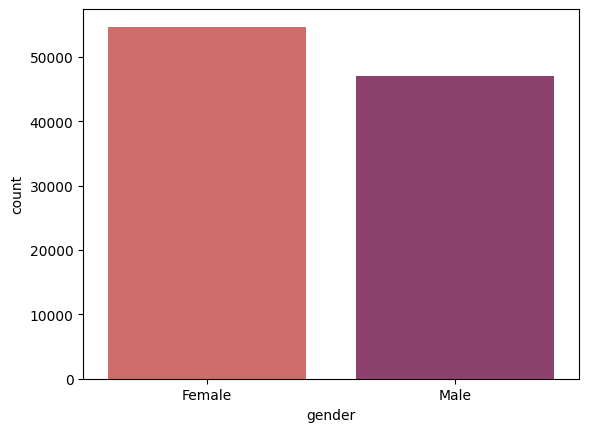

In [120]:
#bar chart analysis for 'gender' feature
sns.countplot(x='gender',data=df_new,palette='flare')
plt.show()

In [121]:
#Age analysis
df_new['age'].value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

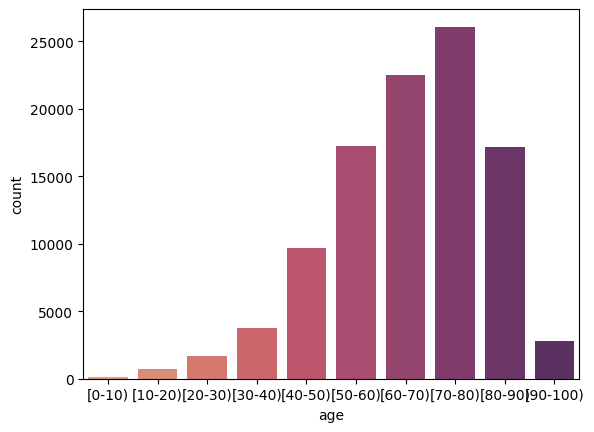

In [122]:
#Bar chart analysis for 'Age' feature
sns.countplot(x='age',data=df_new,palette='flare')
plt.show()

In [123]:
#Replacing unknown values to NaN in feature Payer code
df_new['payer_code'].replace(r'?',np.nan,inplace=True)

In [124]:
#Sum of null values.
df_new.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

#### A1Cresult and payer code has more null values. Deleting columns may effect the model.
#### So droping rows that contasins null values 

In [125]:
df_new.dropna(subset=['A1Cresult'],inplace=True)

In [126]:
df_new.isnull().sum()

race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
payer_code                  6890
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                         0
diag_3                         0
number_diagnoses               0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [127]:
df_new.dropna(subset=['payer_code'],inplace=True)

In [128]:
#Analysis of race feature
df_new['race'].value_counts(dropna=False)

race
Caucasian          7543
AfricanAmerican    1738
?                   345
Hispanic            249
Other               175
Asian                78
Name: count, dtype: int64

In [129]:
#replacing the unknown value with Nan
df_new['race'].replace('?',np.nan,inplace=True)

In [130]:
#Filling the null values using mode imputation
df_new['race']=df_new['race'].fillna(df_new['race'].mode()[0])

In [131]:
df_new['race'].value_counts(dropna=False)

race
Caucasian          7888
AfricanAmerican    1738
Hispanic            249
Other               175
Asian                78
Name: count, dtype: int64

In [132]:
#Analysis of some of the features in the dataset
print(df_new['metformin'].value_counts(dropna=False))
print('------------------')
print(df_new['repaglinide'].value_counts(dropna=False))
print('------------------')
print(df_new['nateglinide'].value_counts(dropna=False))
print('------------------')
print(df_new['chlorpropamide'].value_counts(dropna=False))
print('------------------')
print(df_new['glimepiride'].value_counts(dropna=False))
print('------------------')
print(df_new['acetohexamide'].value_counts(dropna=False))
print('------------------')
print(df_new['glipizide'].value_counts(dropna=False))
print('------------------')
print(df_new['glyburide'].value_counts(dropna=False))
print('------------------')
print(df_new['tolbutamide'].value_counts(dropna=False))
print('------------------')
print(df_new['pioglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['rosiglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['miglitol'].value_counts(dropna=False))
print('------------------')
print(df_new['troglitazone'].value_counts(dropna=False))
print('------------------')
print(df_new['tolazamide'].value_counts(dropna=False))
print('------------------')
print(df_new['examide'].value_counts(dropna=False))
print('------------------')
print(df_new['citoglipton'].value_counts(dropna=False))
print('------------------')
print(df_new['insulin'].value_counts(dropna=False))
print('------------------')
print(df_new['payer_code'].value_counts(dropna=False))
print('------------------')
print(df_new['diag_1'].value_counts(dropna=False))
print('------------------')
print(df_new['diag_2'].value_counts(dropna=False))
print('------------------')
print(df_new['diag_3'].value_counts(dropna=False))

metformin
No        7600
Steady    2215
Up         228
Down        85
Name: count, dtype: int64
------------------
repaglinide
No        9867
Steady     229
Up          26
Down         6
Name: count, dtype: int64
------------------
nateglinide
No        10046
Steady       76
Up            5
Down          1
Name: count, dtype: int64
------------------
chlorpropamide
No        10125
Steady        3
Name: count, dtype: int64
------------------
glimepiride
No        9400
Steady     608
Up          79
Down        41
Name: count, dtype: int64
------------------
acetohexamide
No    10128
Name: count, dtype: int64
------------------
glipizide
No        8727
Steady    1218
Up         113
Down        70
Name: count, dtype: int64
------------------
glyburide
No        9223
Steady     761
Up          95
Down        49
Name: count, dtype: int64
------------------
tolbutamide
No        10127
Steady        1
Name: count, dtype: int64
------------------
pioglitazone
No        9282
Steady     784
Up   

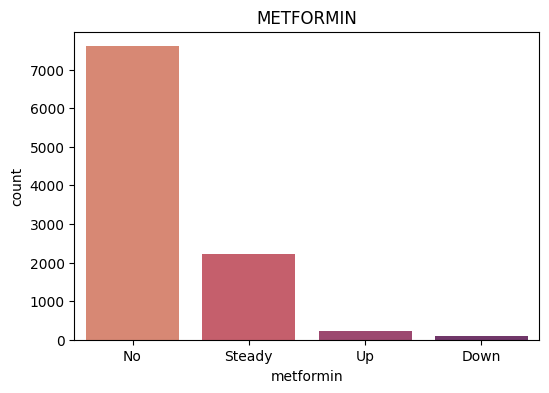

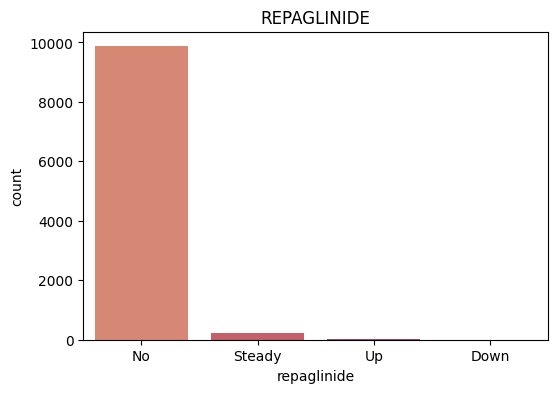

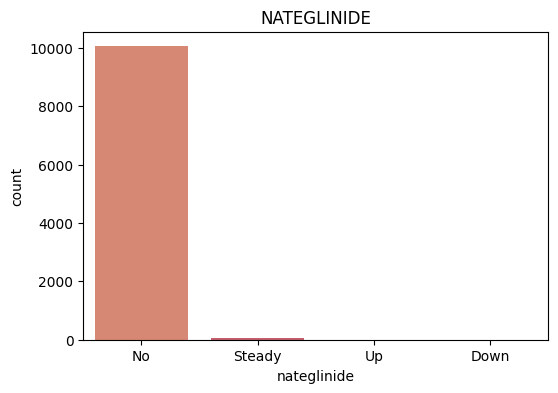

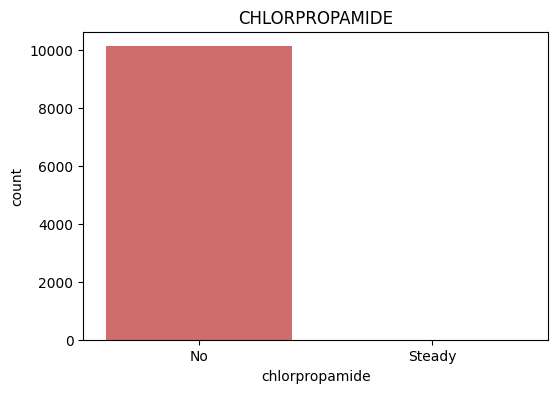

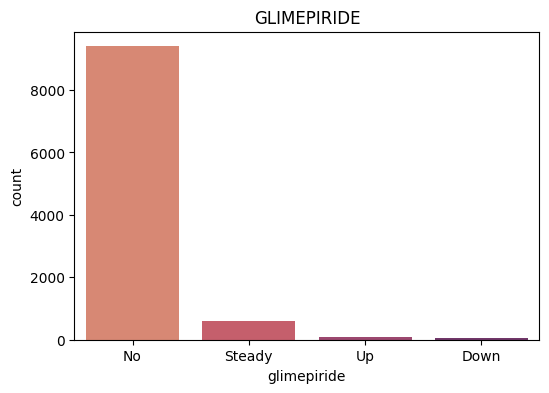

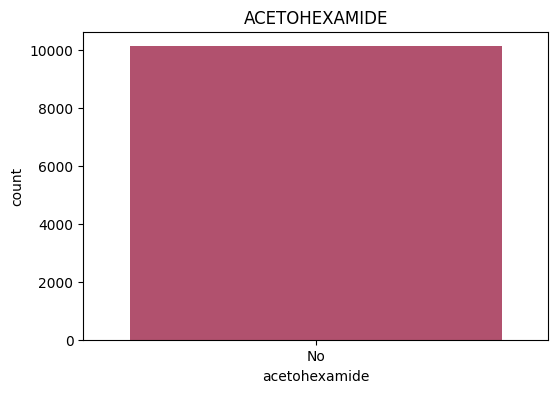

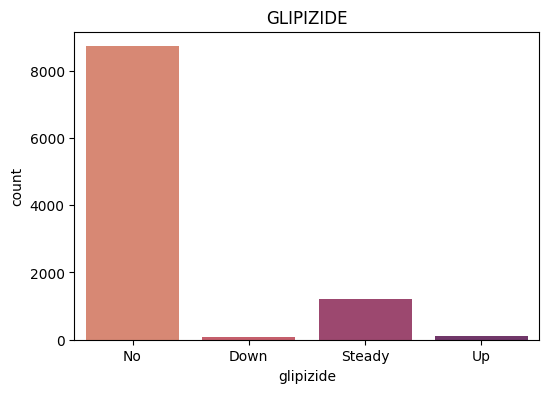

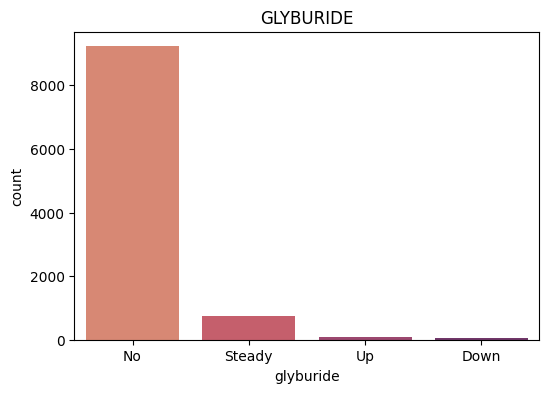

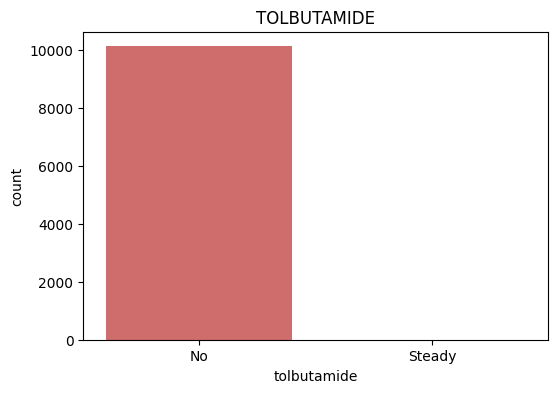

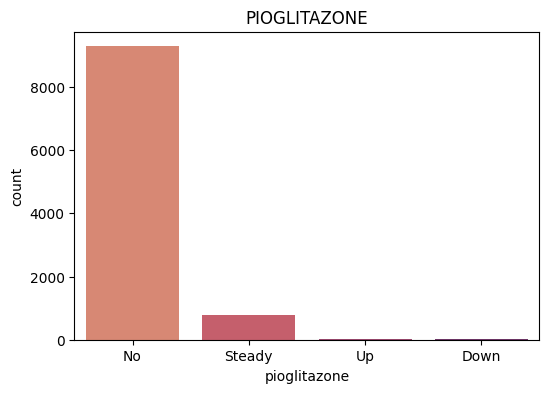

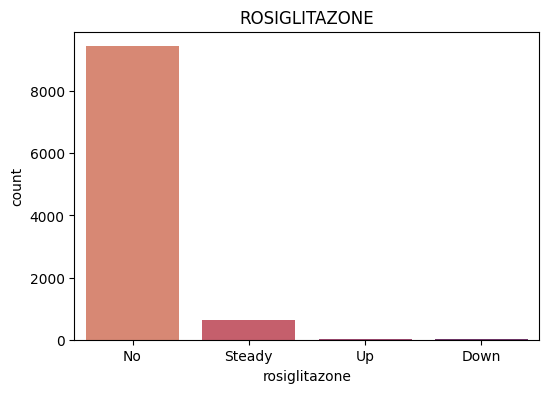

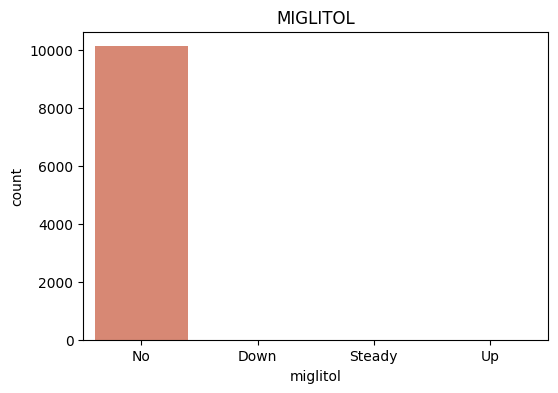

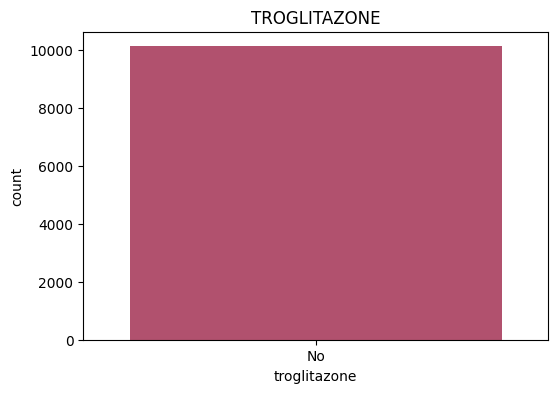

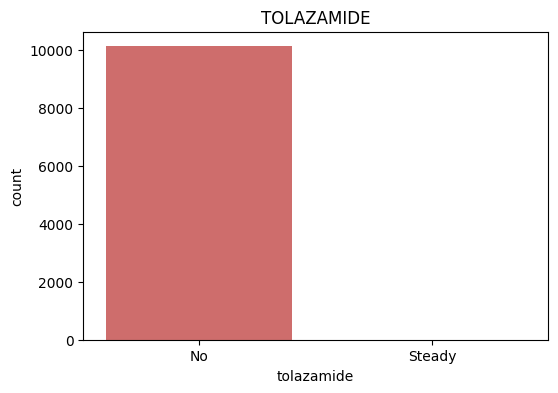

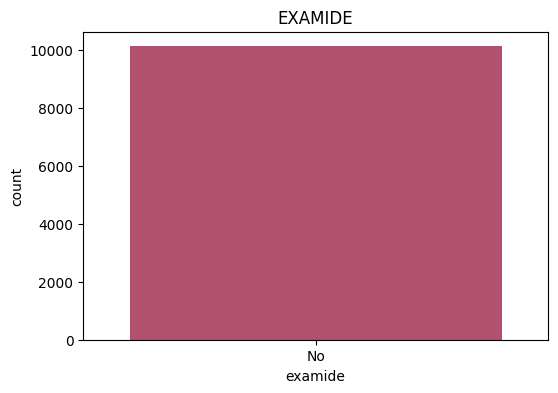

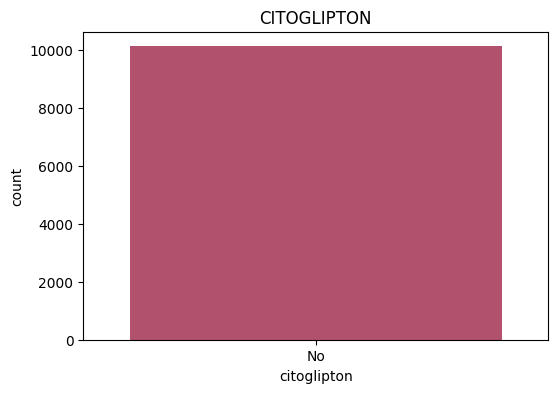

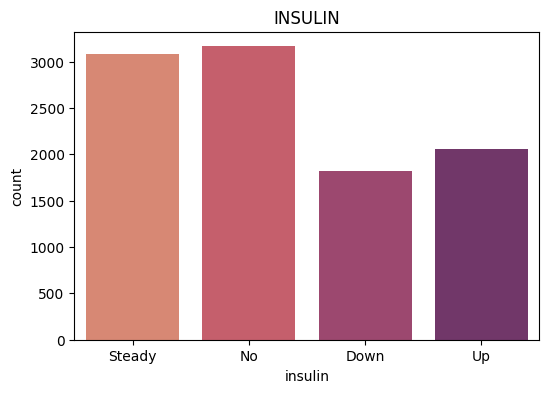

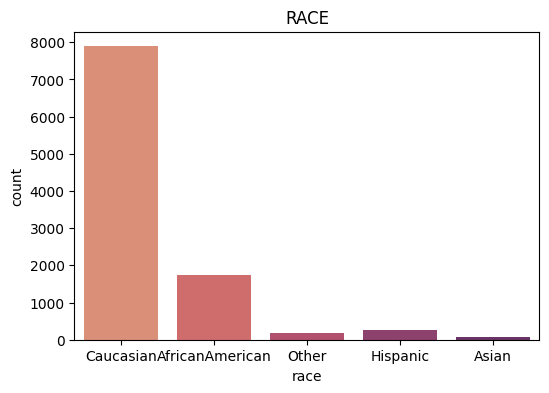

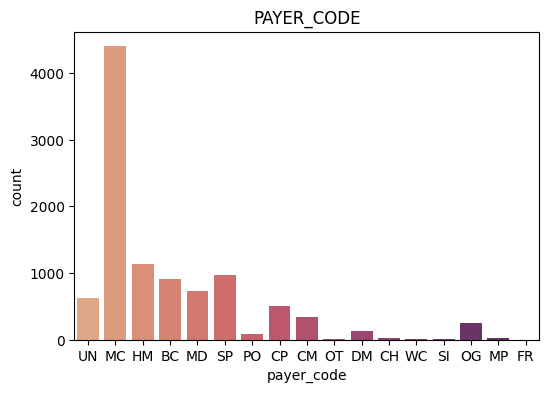

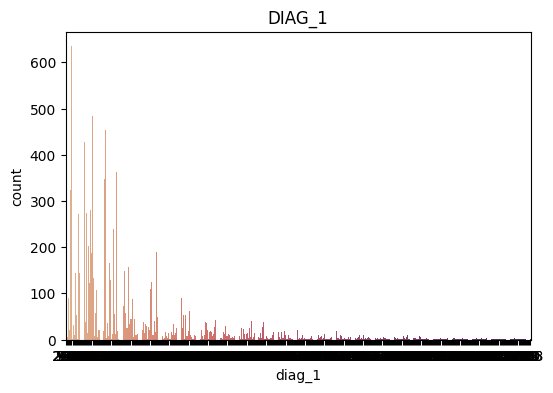

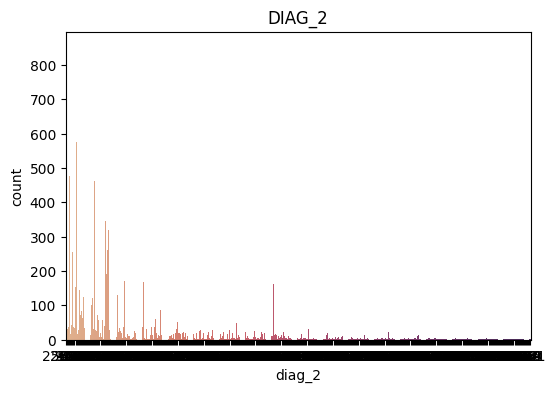

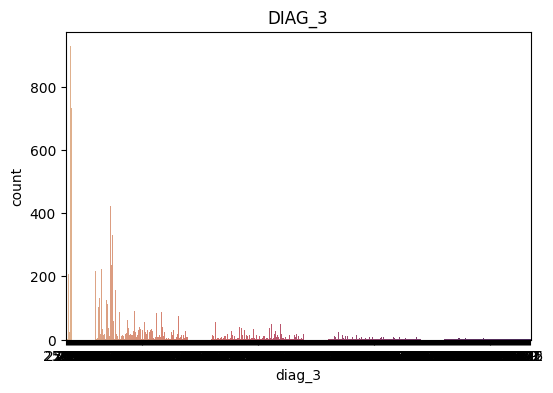

In [133]:
#Countplot of the some features
def f(i):
    plt.figure(figsize=(6,4))
    sns.countplot(x=i,data=df_new,palette='flare')
    plt.title(i.upper())
    plt.show()
    return
f('metformin')
f('repaglinide')
f('nateglinide')
f('chlorpropamide')
f('glimepiride')
f('acetohexamide')
f('glipizide')
f('glyburide')
f('tolbutamide')
f('pioglitazone')
f('rosiglitazone')
f('miglitol')
f('troglitazone')
f('tolazamide')
f('examide')
f('citoglipton')
f('insulin')
f('race')
f('payer_code')
f('diag_1')
f('diag_2')
f('diag_3')

## Imbalance data

Imbalanced data occurs when one class in your dataset significantly outnumbers the other. This can pose challenges for machine learning models, as they might be biased towards the majority class.

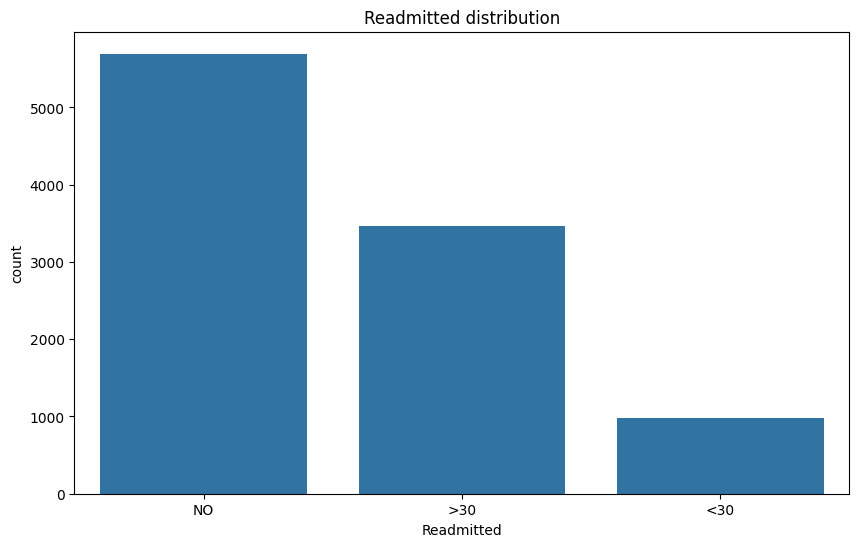

In [134]:
plt.figure(figsize=(10,6))
sns.countplot(x='readmitted',data=df_new)
plt.title('Readmitted distribution')
plt.xlabel('Readmitted')
plt.show()

### Addressing Imbalanced Data

If your data is imbalanced, you can consider techniques like:

Oversampling: Increasing the number of instances in the minority class.

Undersampling: Reducing the number of instances in the majority class.

Class weighting: Adjusting the weights of different classes during model training.

Ensemble methods: Combining multiple models to improve performance.

Remember: The best approach depends on the specific characteristics of your dataset and the problem you're trying to solve.

In [135]:
#seperating features and target
X=df_new.drop('readmitted',axis=1)
Y=df_new['readmitted']
from imblearn.over_sampling import RandomOverSampler

#Applying random over sammpling
ros=RandomOverSampler(random_state=42)
X_resampled,Y_resampled=ros.fit_resample(X,Y)

#creating new dataset with resampled data
df_new1=pd.concat([X_resampled, Y_resampled], axis=1)

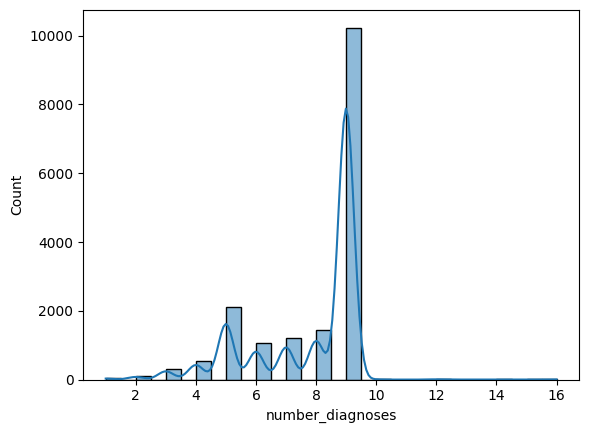

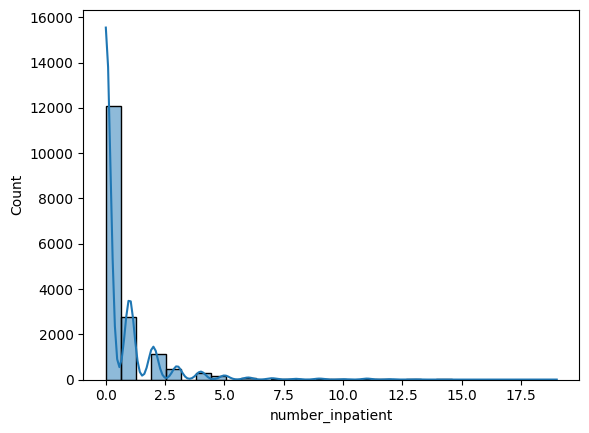

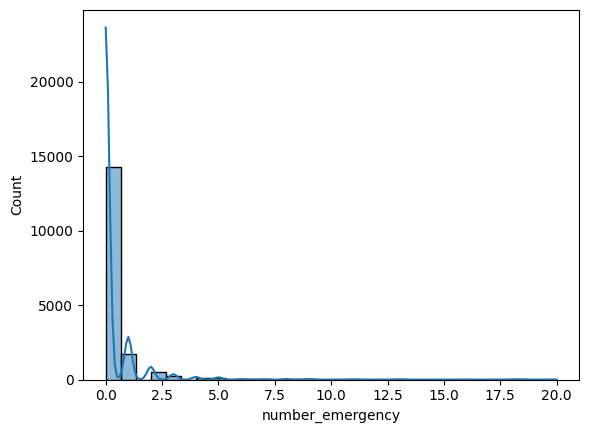

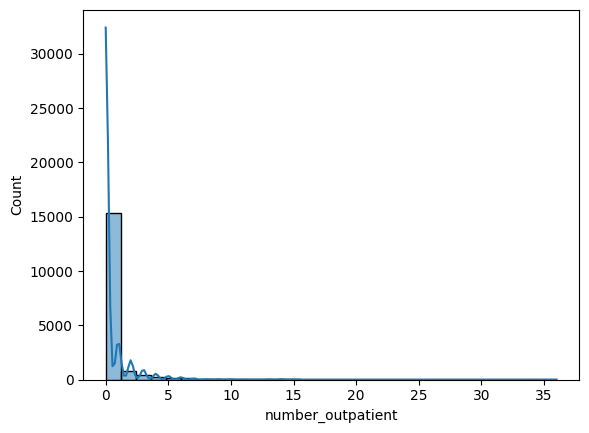

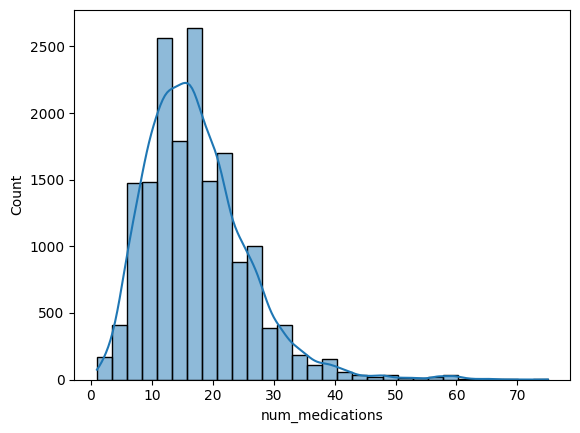

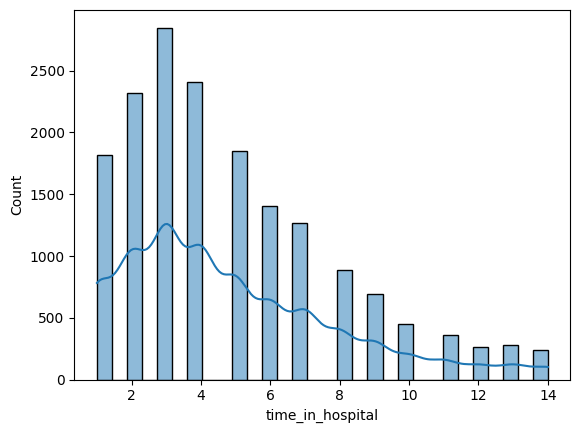

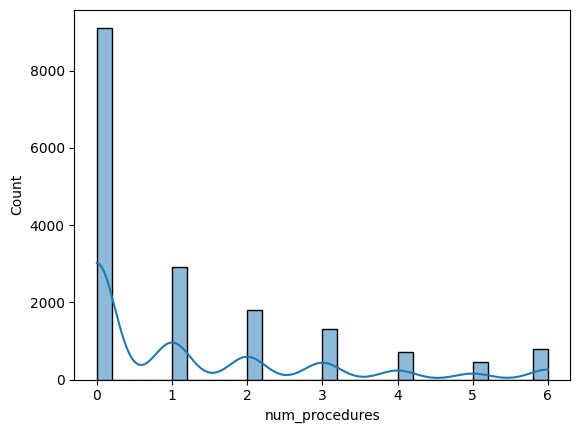

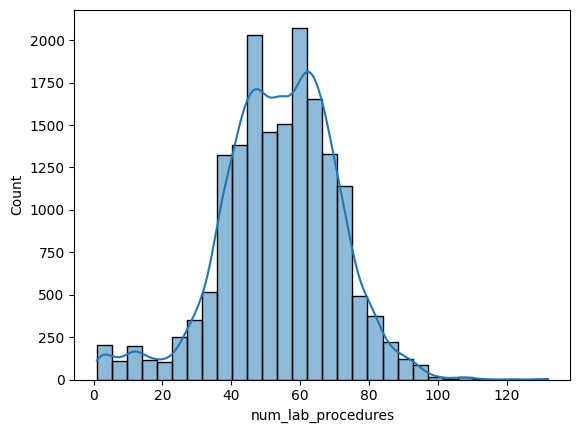

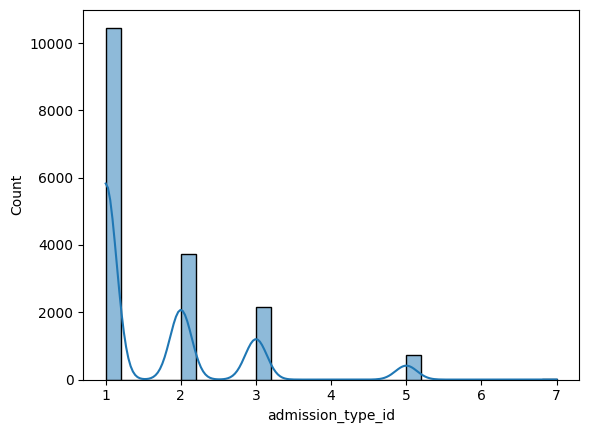

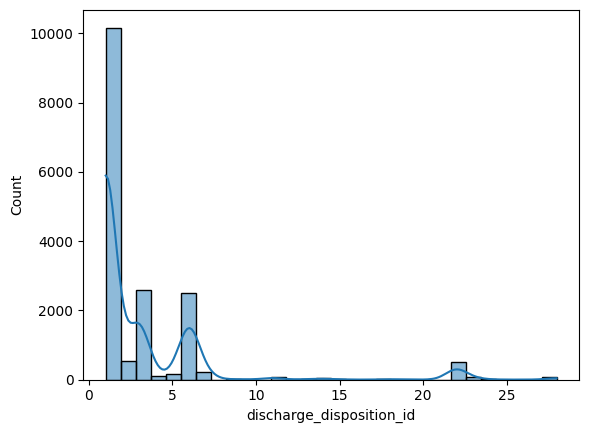

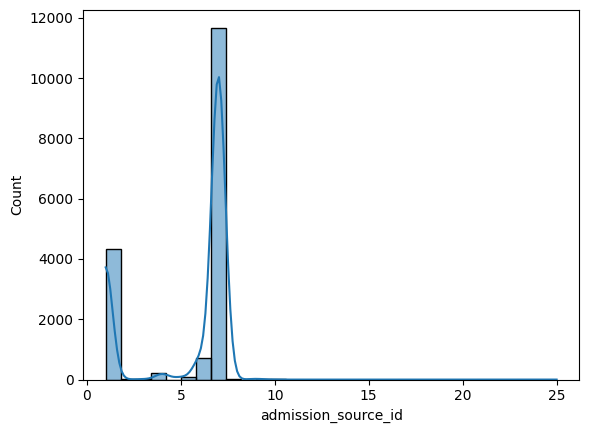

In [136]:
#Histogram distribution of numerical values, the distribution of histogram is also helps to find if there is outliers or not
def n(i):
    sns.histplot(data=df_new1,x=i,bins=30,kde=True)
    plt.show()
    return
n('number_diagnoses')
n('number_inpatient')
n('number_emergency')
n('number_outpatient')
n('num_medications')
n('time_in_hospital')
n('num_procedures')
n('num_lab_procedures')
n('admission_type_id')
n('discharge_disposition_id')
n('admission_source_id')

From the above analysis **Number of lab procedures**,**Number of medications**,**number_outpatient**,**number_emergency**,**number_inpatient** are posetively skewed. **number_diagnoses** is negatively skewed. All has outliers

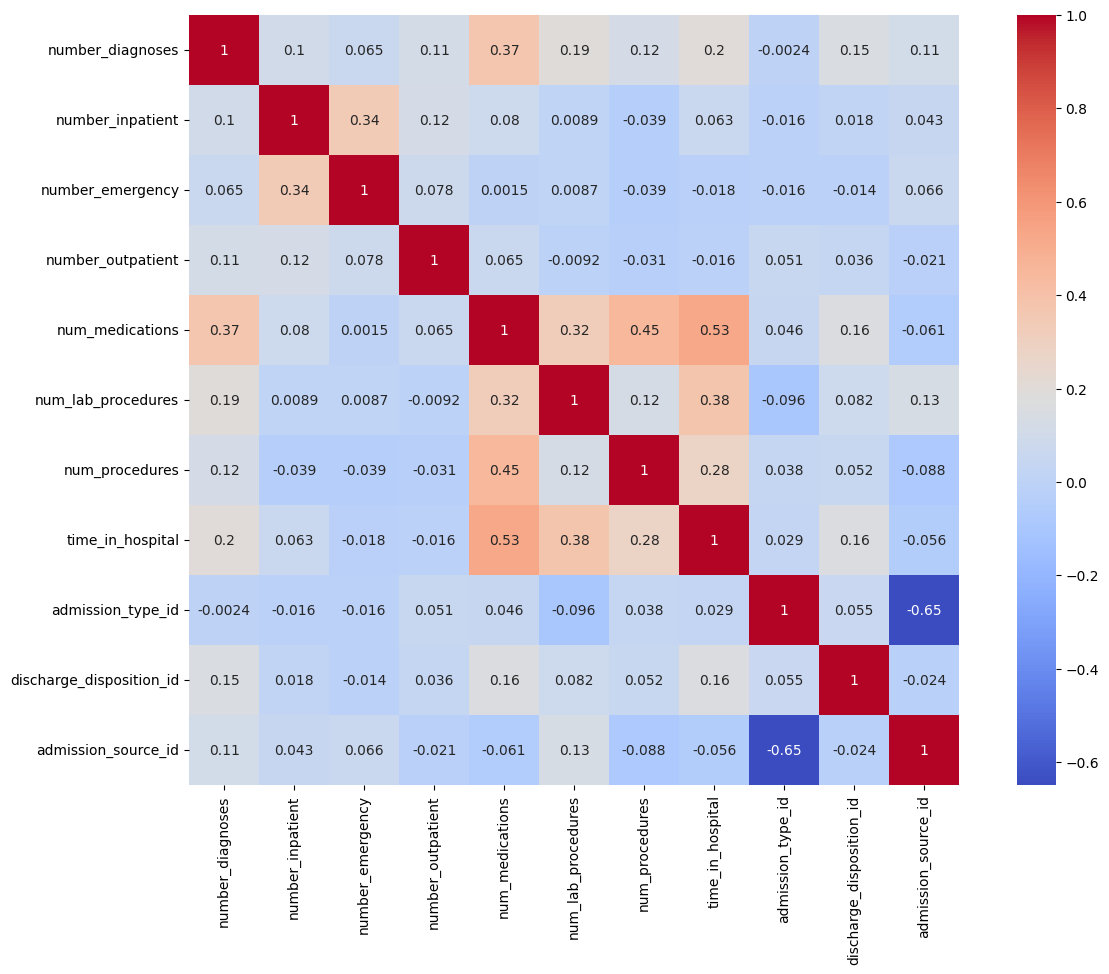

In [137]:
#Checking the correlation using heatmap
#First of all correlation between numeric variables
numeric_corr=df_new[['number_diagnoses','number_inpatient','number_emergency','number_outpatient','num_medications','num_lab_procedures','num_procedures','time_in_hospital','admission_type_id','discharge_disposition_id','admission_source_id']]
plt.figure(figsize=(15,10))
sns.heatmap(numeric_corr.corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

**Looks like the numerical variables are independant to each other**

# <font color="#4863A0"> Data Cleaning 🧹</font>
Data cleaning refers to the process of **identifying**, **correcting**, and **removing errors**, **inconsistencies**, and **inaccuracies** from a dataset. It involves transforming raw data into a clean and structured format that is suitable for analysis, modeling, and other data-related tasks, including:
- Remove Unneeded Features
- Handling Missing Values
- Encoding Categorical Variables
- Handling Outliers
- Handling Duplicates

Already removed unwanted columns 

## <font size="4" face="WildWest">2. Handling Missing Values</font>

**Missing values** are data points that are absent or not recorded for certain variables in a dataset. This can happen because of mistakes such as data entry errors, equipment failures, or simply because the information is not available.

 **How to detect missing values?**
 - Look for blank cells and use data analysis tools that can identify missing values like .isnull() functoin.

 **Decision options:**
1. Keep them 
    - Not ideal, as missing values can lead to biased analyses and inaccurate predictions.
2. Reassign new values to them (Using specific techniques)
    - Imputation (Y):
        - Replace missing values with estimated or calculated values based on the available data. This can be done using various methods such as:
            1. **Mean/Median Imputation:** Replace with the average (mean) or middle value (median) for numerical data.
            2. **Mode Imputation:** Replace with the most frequent value.
    - Forward/Backward Fill (N):
        - For time-series data, missing values can be filled with the last observed value (forward fill) or the next observed value (backward fill).
    - Interpolation (N):
        - Estimate missing values based on the trend or pattern observed in the existing data points.
3. Delete them (Sometimes necessary, especially if missing values are extensive and cannot be reasonably imputed without introducing significant bias.)

In [138]:
null_values=df_new1.isnull().sum()
print(null_values)

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

***There is no major null or missing values***

**Encoding categorical variables**

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
label_encoder=LabelEncoder()
def label(i):
    print(df_new1[i].value_counts(dropna=False))
    df_new1[i]=label_encoder.fit_transform(df_new1[i])
    print(df_new1[i].value_counts(dropna=False))
    print('-------------')
    return
label('gender')
label('age')
label('metformin')
label('repaglinide')
label('nateglinide')
label('chlorpropamide')
label('glimepiride')
label('acetohexamide')
label('glipizide')
label('glyburide')
label('tolbutamide')
label('pioglitazone')
label('rosiglitazone')
label('acarbose')
label('miglitol')
label('troglitazone')
label('tolazamide')
label('examide')
label('citoglipton')
label('insulin')
label('glyburide-metformin')
label('glipizide-metformin')
label('glimepiride-pioglitazone')
label('metformin-rosiglitazone')
label('metformin-pioglitazone')
label('change')
label('diabetesMed')
label('race')
label('A1Cresult')
label('payer_code')
label('diag_1')
label('diag_2')
label('diag_3')

gender
Female    8749
Male      8336
Name: count, dtype: int64
gender
0    8749
1    8336
Name: count, dtype: int64
-------------
age
[70-80)     3771
[60-70)     3632
[50-60)     3183
[80-90)     2608
[40-50)     2089
[30-40)      811
[20-30)      483
[90-100)     392
[10-20)      109
[0-10)         7
Name: count, dtype: int64
age
7    3771
6    3632
5    3183
8    2608
4    2089
3     811
2     483
9     392
1     109
0       7
Name: count, dtype: int64
-------------
metformin
No        12954
Steady     3676
Up          314
Down        141
Name: count, dtype: int64
metformin
1    12954
2     3676
3      314
0      141
Name: count, dtype: int64
-------------
repaglinide
No        16624
Steady      405
Up           47
Down          9
Name: count, dtype: int64
repaglinide
1    16624
2      405
3       47
0        9
Name: count, dtype: int64
-------------
nateglinide
No        16939
Steady      138
Up            6
Down          2
Name: count, dtype: int64
nateglinide
1    16939
2      13

In [141]:
#Transforming target variable
print(df_new1['readmitted'].value_counts(dropna=False))
df_new1['readmitted']=label_encoder.fit_transform(df_new1['readmitted'])
print(df_new1['readmitted'].value_counts(dropna=False))

readmitted
NO     5695
>30    5695
<30    5695
Name: count, dtype: int64
readmitted
2    5695
1    5695
0    5695
Name: count, dtype: int64


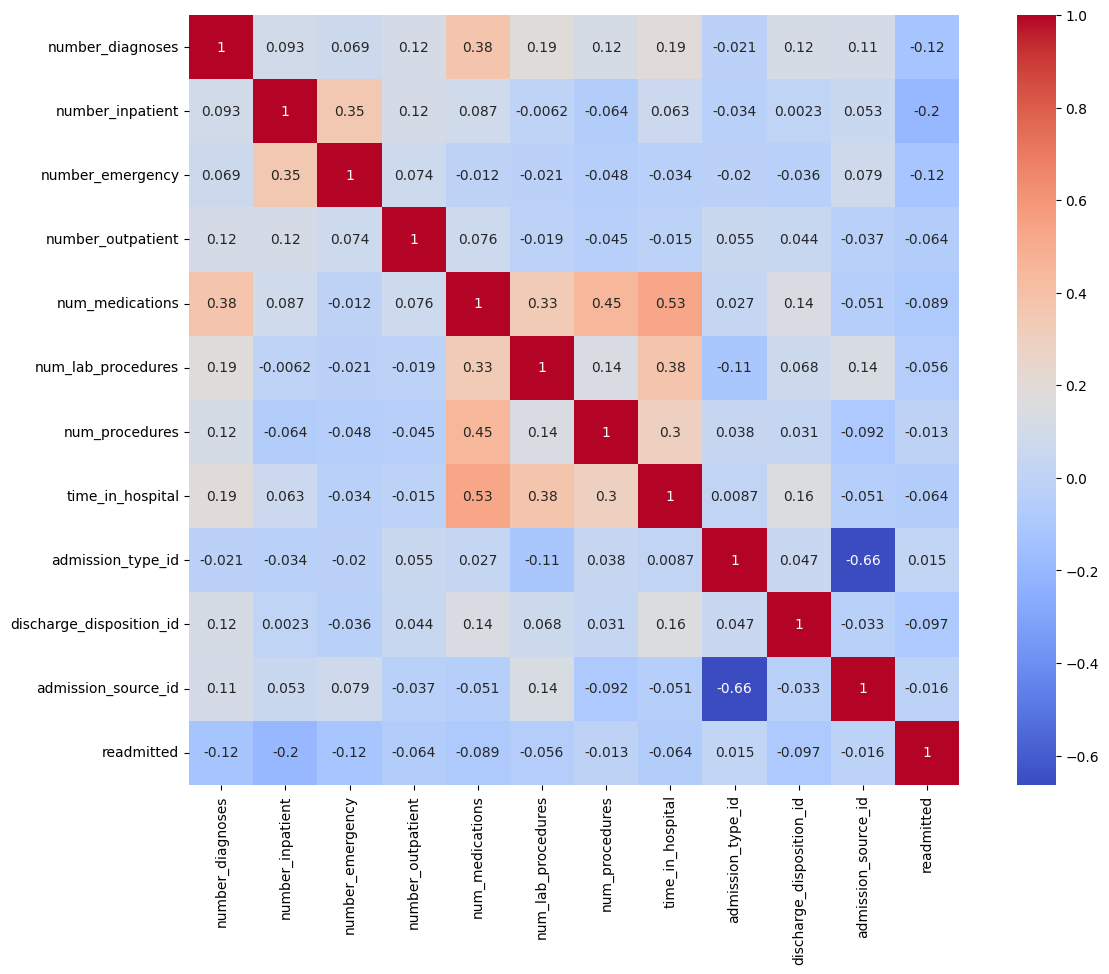

In [142]:
#Checking the correlation using heatmap
#First of all correlation between numeric variables
plt.figure(figsize=(15,10))
numeric_corr=df_new1[['number_diagnoses','number_inpatient','number_emergency','number_outpatient','num_medications','num_lab_procedures','num_procedures','time_in_hospital','admission_type_id','discharge_disposition_id','admission_source_id','readmitted']]
sns.heatmap(numeric_corr.corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

## <font size="4" face="WildWest">4. Handling Outliers</font>

**Outliers** are data points that significantly differ from the rest of the observations in a dataset, often due to errors in data collection or genuine extreme values.

 **How to detect outliers?**
- Visualization data (Numerical values)

 **Decision options:**
1. Keep them - Not a good solution.
2. Reassign new values to them (Using specific techniques)
    - Capping Outliers (N)
        - Instead of removing outliers entirely, replace extreme values with more reasonable thresholds.
    - Robust Scaling (Y)
        - Use scaling methods less sensitive to outliers (e.g., IQR scaling, standardization with robust estimators).
            - Robust Scaling Function
            - IQR scaling
    - Replace with mean (N)
        - Replacing the outliers with the mean value
3. Delete them (N)

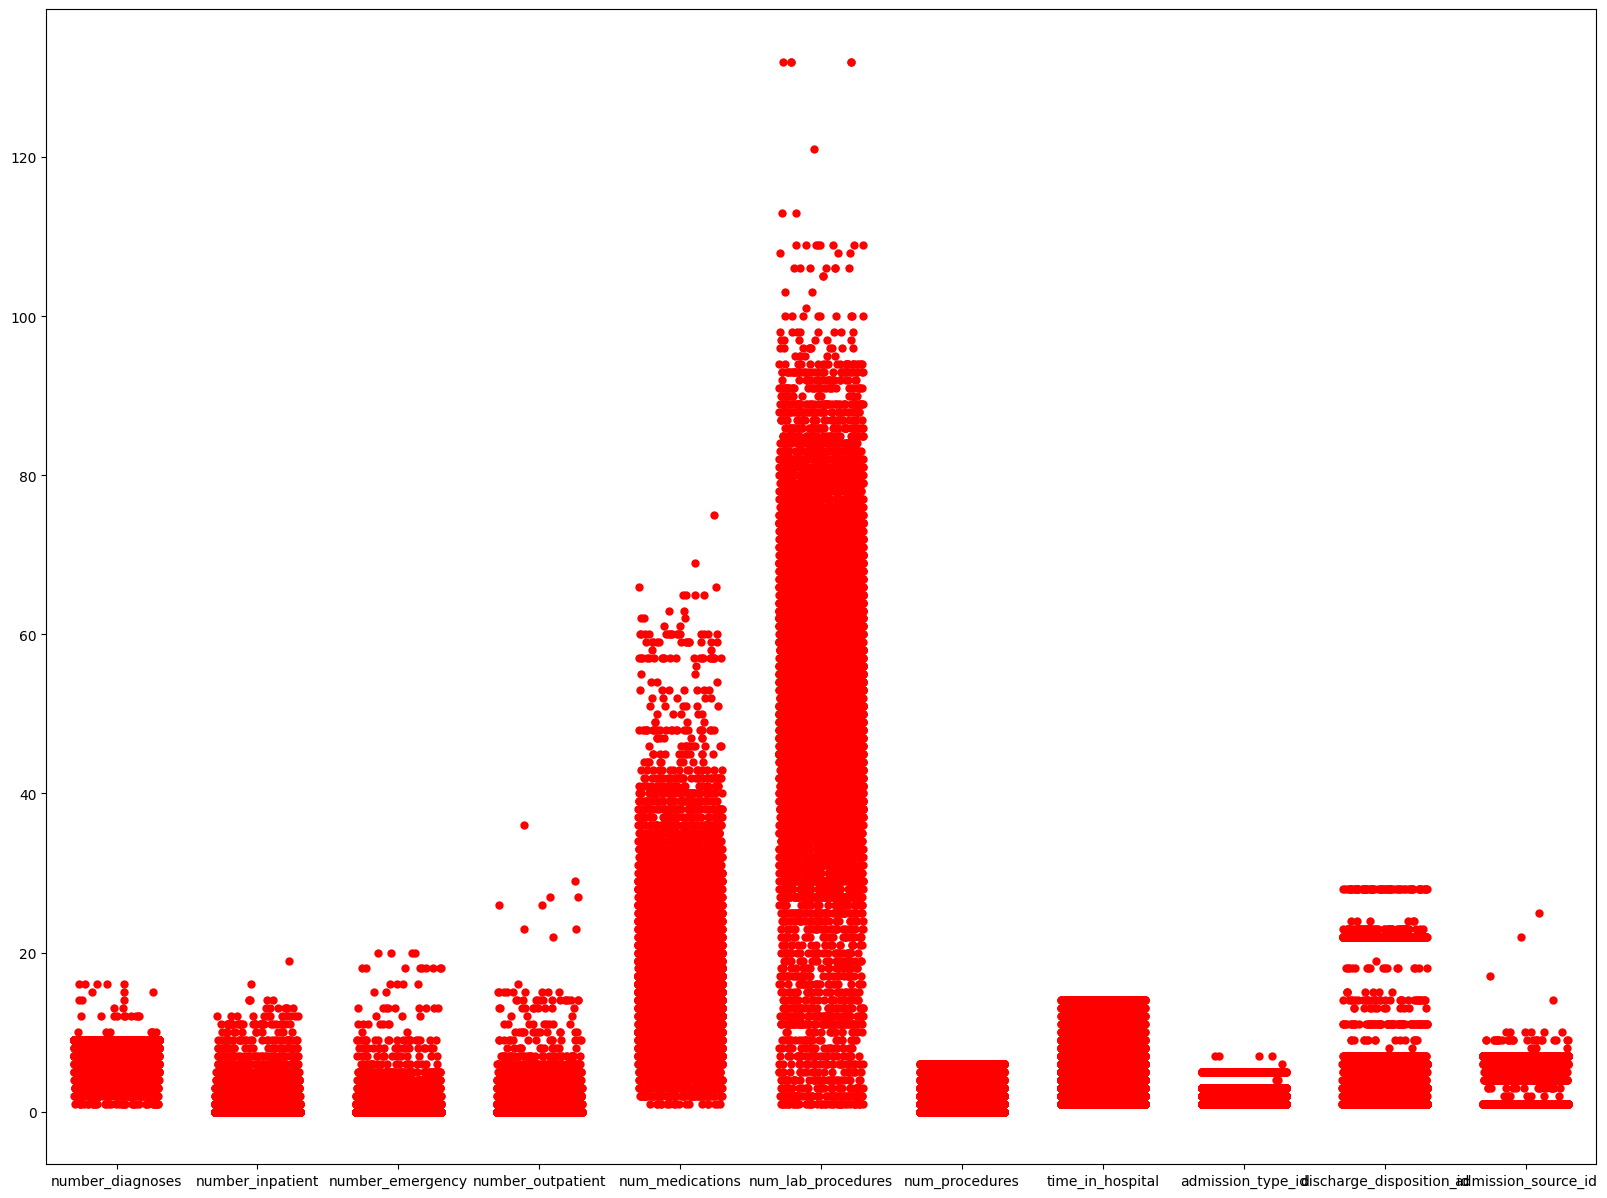

In [143]:
#Checking the outliers of numerical variables using stripplot
numerical_outliers=df_new1[['number_diagnoses','number_inpatient','number_emergency','number_outpatient','num_medications','num_lab_procedures','num_procedures','time_in_hospital','admission_type_id','discharge_disposition_id','admission_source_id']]
plt.figure(figsize=(20,15))
sns.stripplot(data=numerical_outliers,color='red',jitter=0.3,size=6)
plt.show()

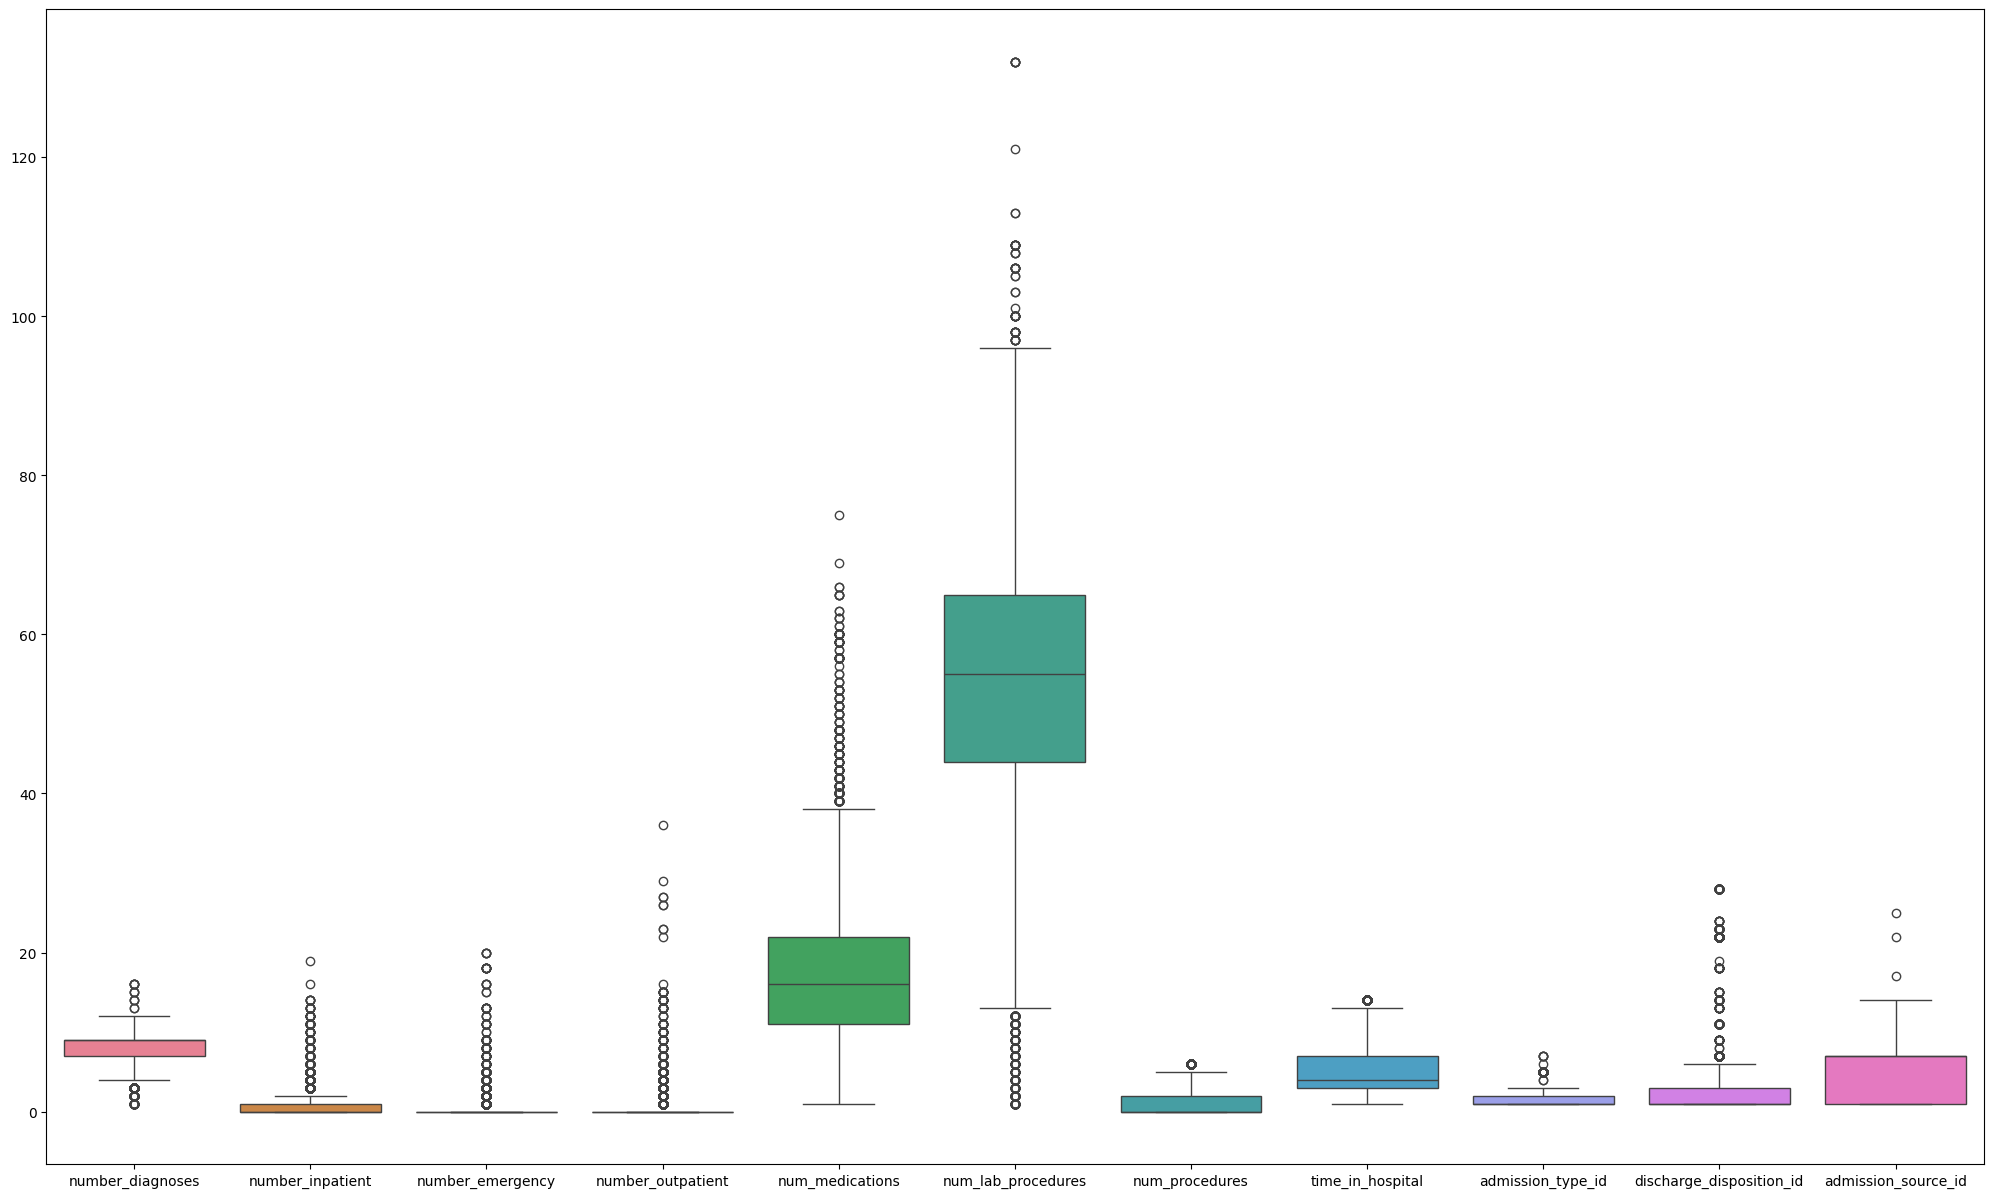

number_diagnoses           -1.177660
number_inpatient            4.190914
number_emergency            7.737850
number_outpatient           7.155997
num_medications             1.192503
num_lab_procedures         -0.391504
num_procedures              1.473384
time_in_hospital            0.958583
admission_type_id           1.808093
discharge_disposition_id    3.448650
admission_source_id        -1.004623
dtype: float64

In [144]:
plt.figure(figsize=(25,15))
sns.boxplot(numerical_outliers)
plt.show()
numerical_outliers.skew()

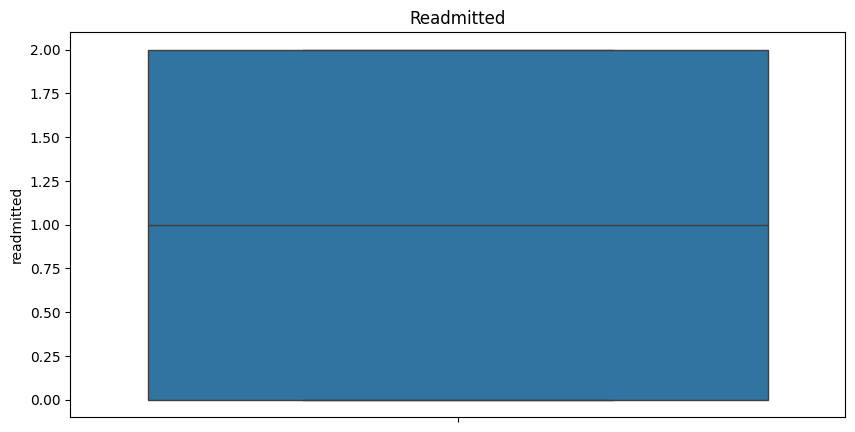

In [145]:
#Checking outliers or skewness of target variable
plt.figure(figsize=(10,5))
sns.boxplot(y=df_new1['readmitted'])
plt.title('Readmitted')
plt.show()

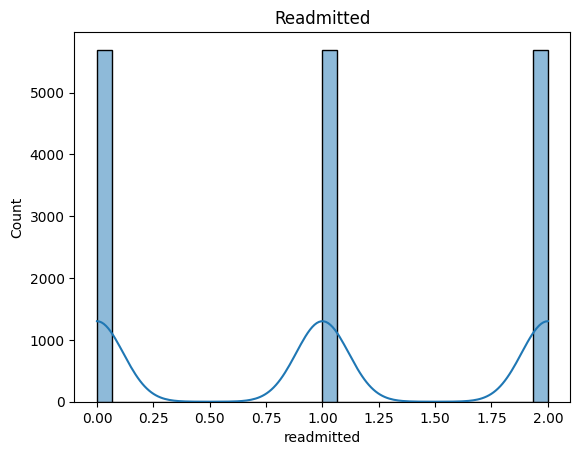

In [146]:
sns.histplot(data=df_new1,x='readmitted',bins=30,kde=True)
plt.title('Readmitted')
plt.show()

Treating outliers of numerical columns 

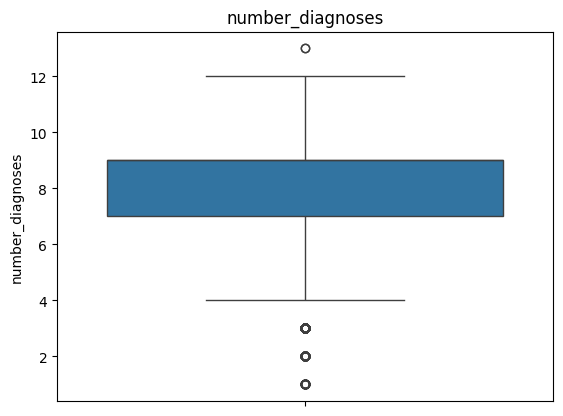

-1.2355906112781905


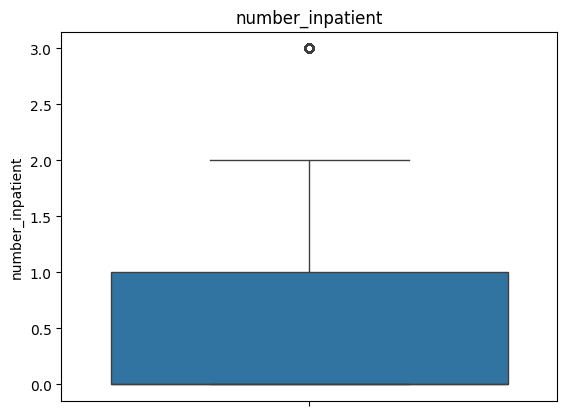

2.0096451658957553


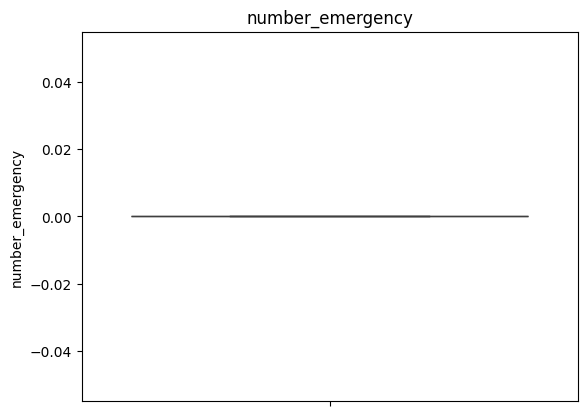

0.0


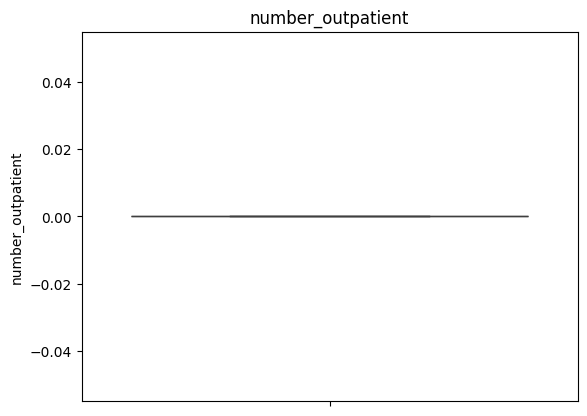

0.0


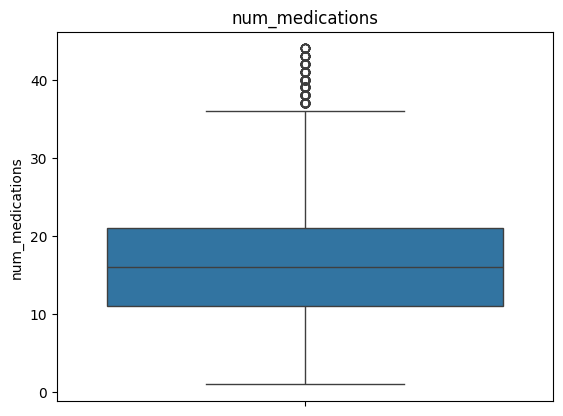

0.6425266981433102


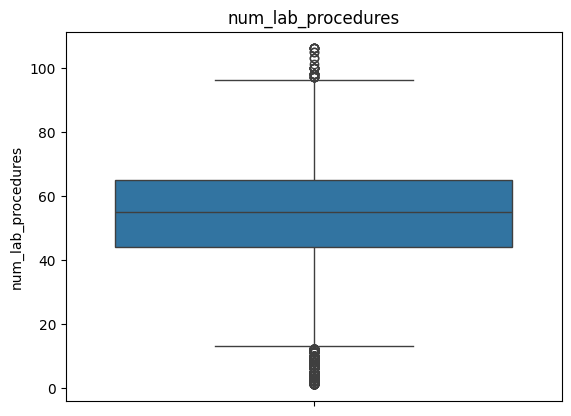

-0.4504376655016255


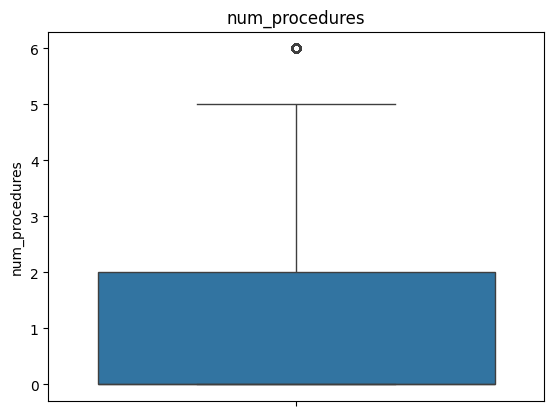

1.4733838113491977


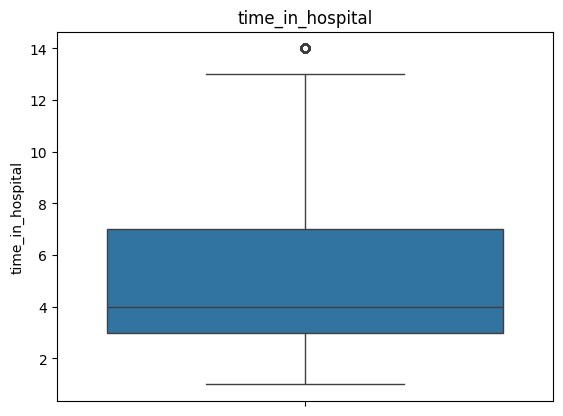

0.9585834661034593


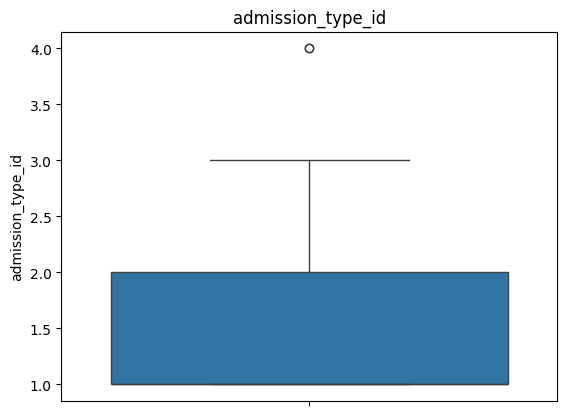

1.172860050603643


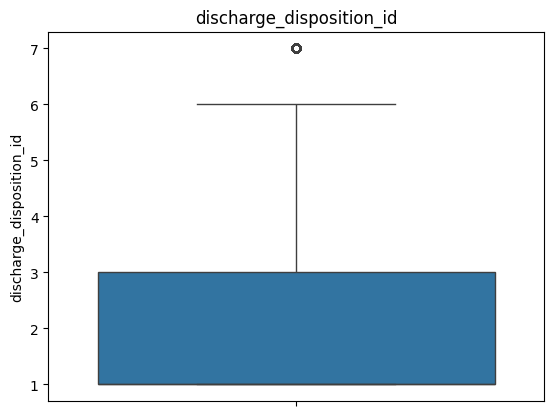

1.3057595353031253


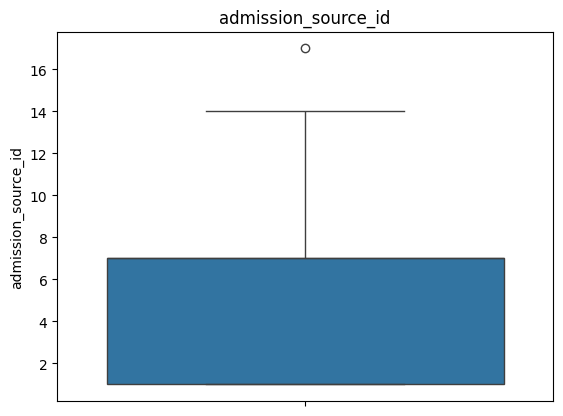

-1.0514974143591624


In [147]:
#Treating outliers using IQR method
def outlier(i):
    Q1=df_new1[i].quantile(0.25)
    Q3=df_new1[i].quantile(0.75)
    IQR=Q3-Q1
    upper=Q1+3*IQR
    lower=Q1-3*IQR
    outliers=(df_new1[i]>upper) | (df_new1[i]<lower)
    m=df_new1[i].median()
    df_new1.loc[outliers,i]=m
    sns.boxplot(y=df_new1[i])
    plt.title(i)
    plt.show()
    print(df_new1[i].skew())
    return
outlier('number_diagnoses')
outlier('number_inpatient')
outlier('number_emergency')
outlier('number_outpatient')
outlier('num_medications')
outlier('num_lab_procedures')
outlier('num_procedures')
outlier('time_in_hospital')
outlier('admission_type_id')
outlier('discharge_disposition_id')
outlier('admission_source_id')

In [149]:
#Using square root method to get good skew vallues
def sqrt(i):
    df_new1[i]=np.sqrt(df_new1[i])
    print(df_new1[i].skew())
    return
#sqrt('number_diagnoses')
sqrt('number_inpatient')
sqrt('number_emergency')
sqrt('number_outpatient')
#sqrt('num_medications')
#sqrt('num_lab_procedures')
sqrt('num_procedures')
#sqrt('time_in_hospital')
sqrt('discharge_disposition_id')
#sqrt('admission_source_id')

1.1771614373604367
0.0
0.0
0.27690495726861597
0.9970708799803848


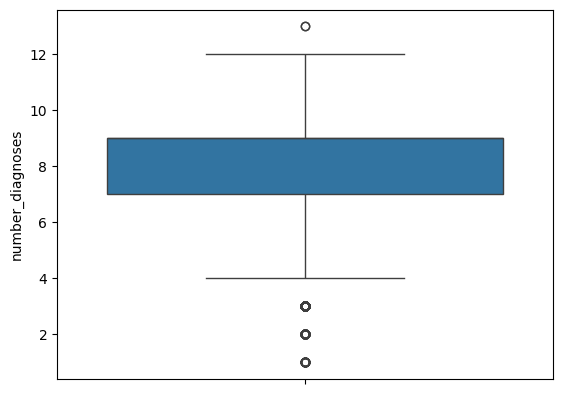

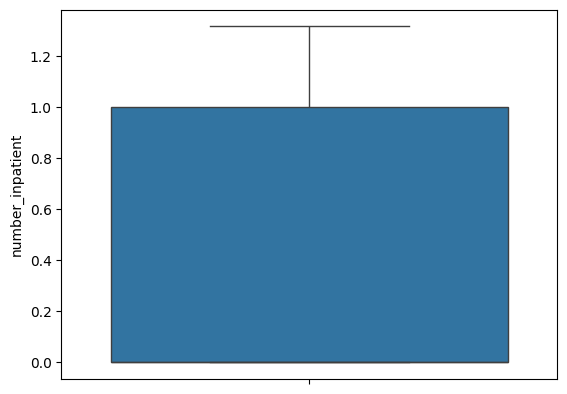

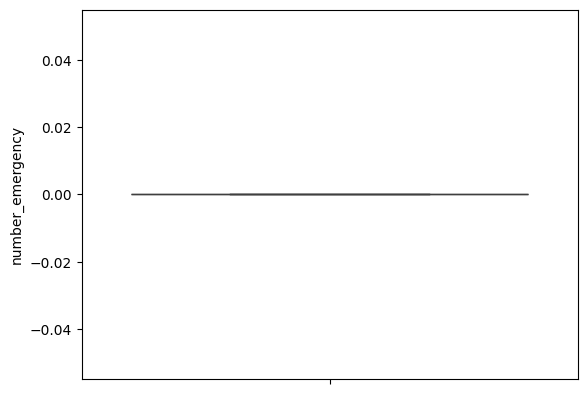

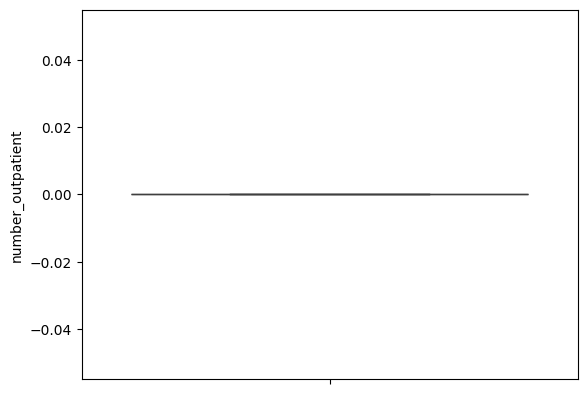

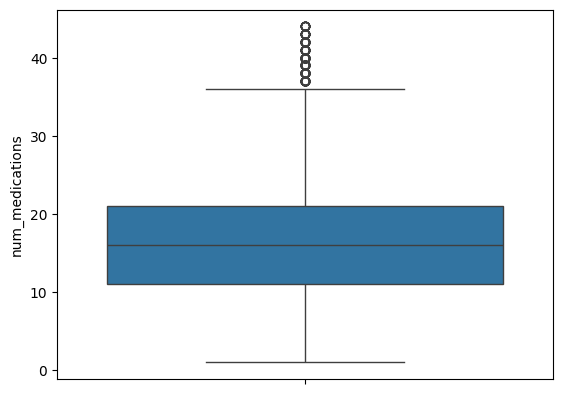

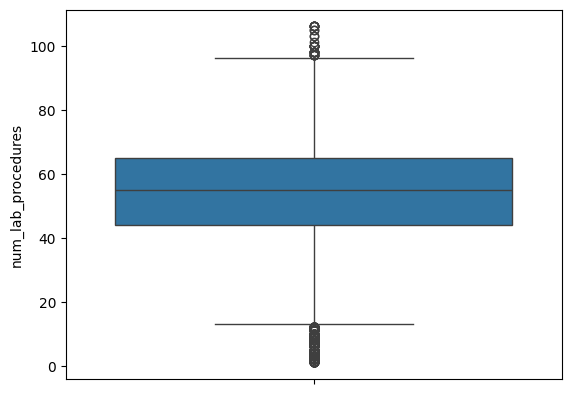

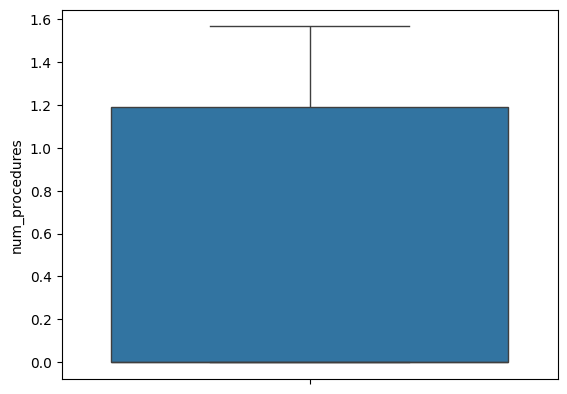

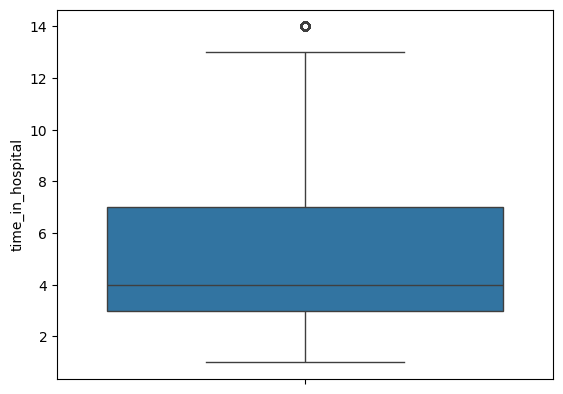

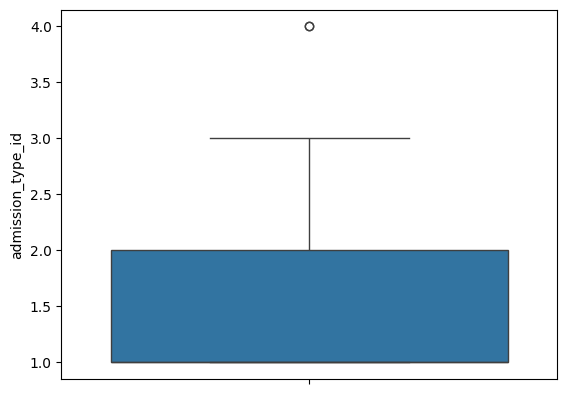

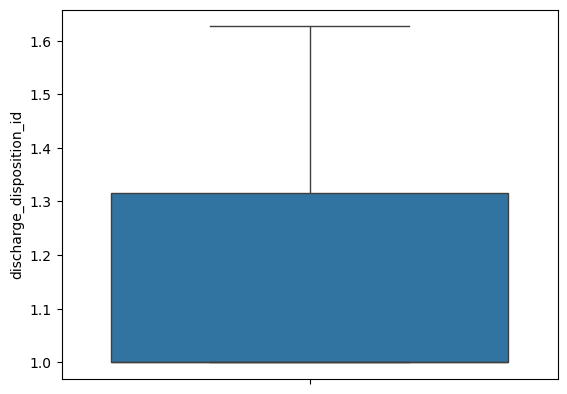

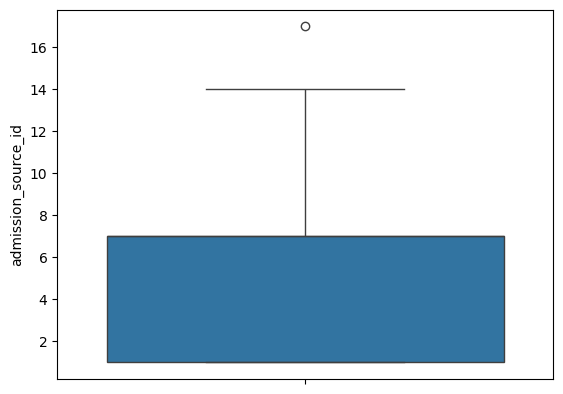

In [150]:
#Resulting boxplot and histplot after outlier treatment
def outlier(i):
    sns.boxplot(y=df_new1[i])
    plt.show()
    return
outlier('number_diagnoses')
outlier('number_inpatient')
outlier('number_emergency')
outlier('number_outpatient')
outlier('num_medications')
outlier('num_lab_procedures')
outlier('num_procedures')
outlier('time_in_hospital')
outlier('admission_type_id')
outlier('discharge_disposition_id')
outlier('admission_source_id')

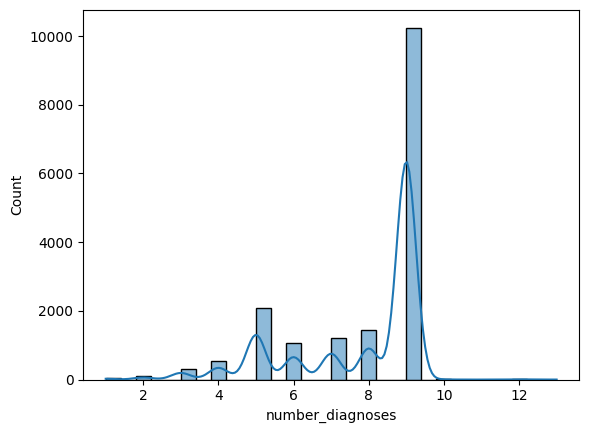

-1.2355906112781905


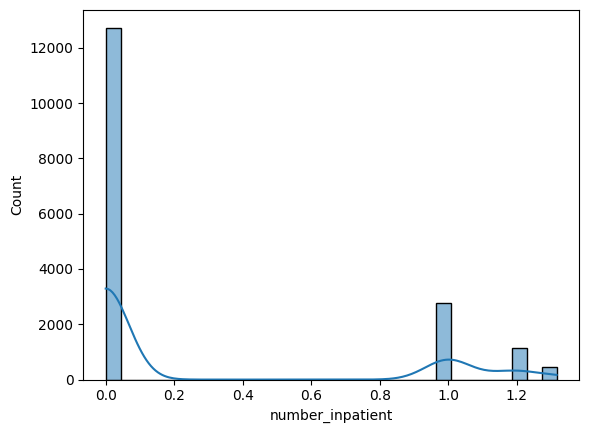

1.1771614373604367


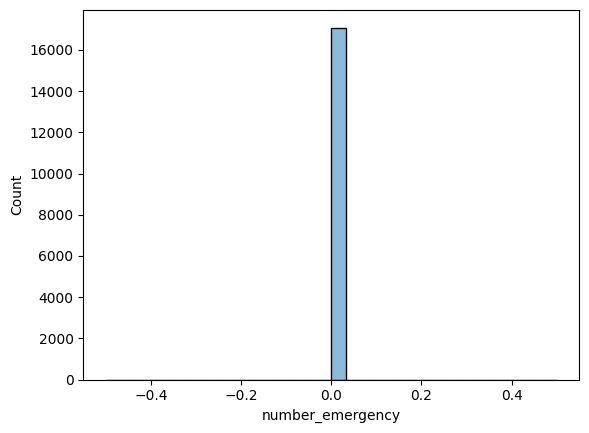

0.0


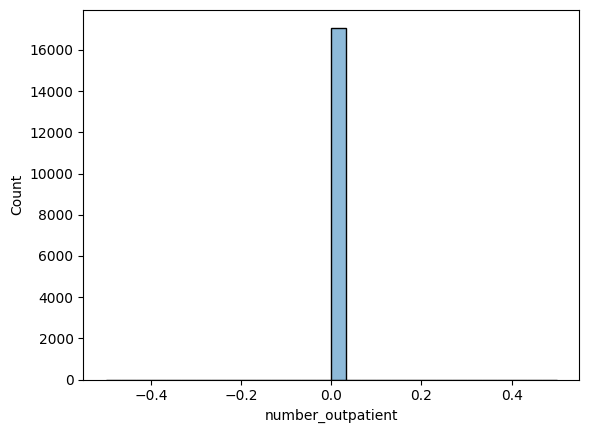

0.0


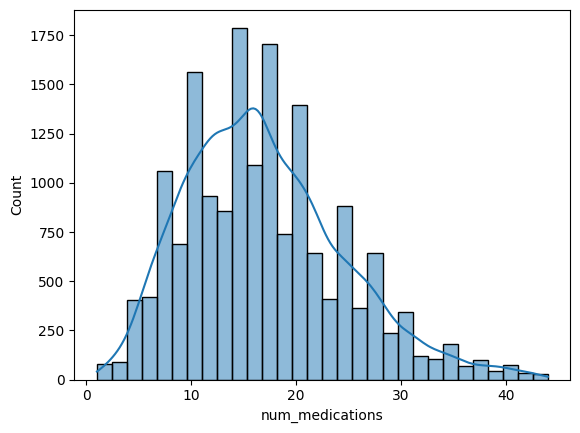

0.6425266981433102


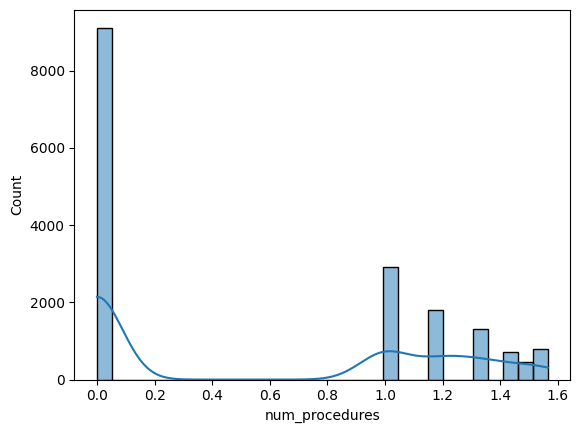

0.27690495726861597


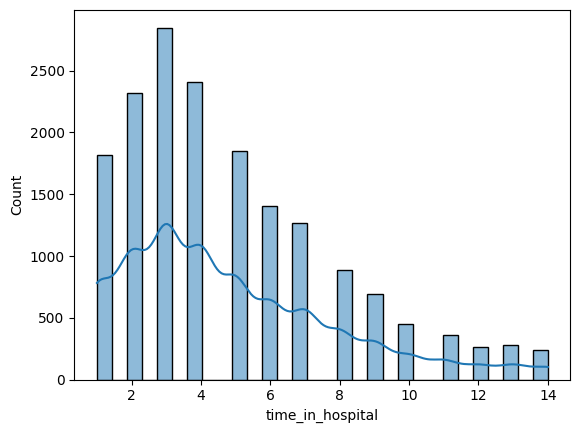

0.9585834661034593


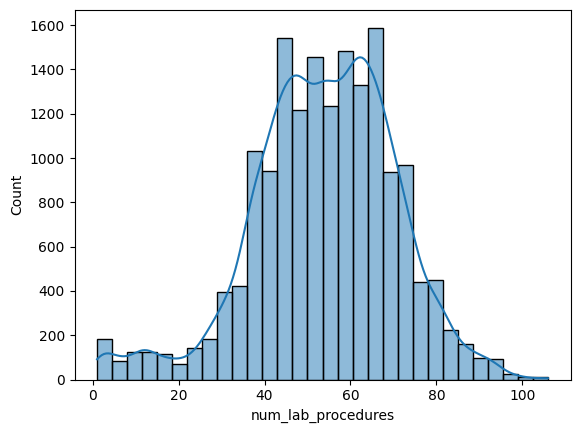

-0.4504376655016255


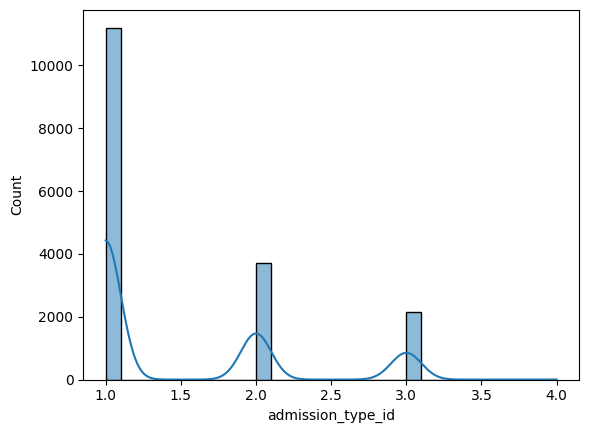

1.172860050603643


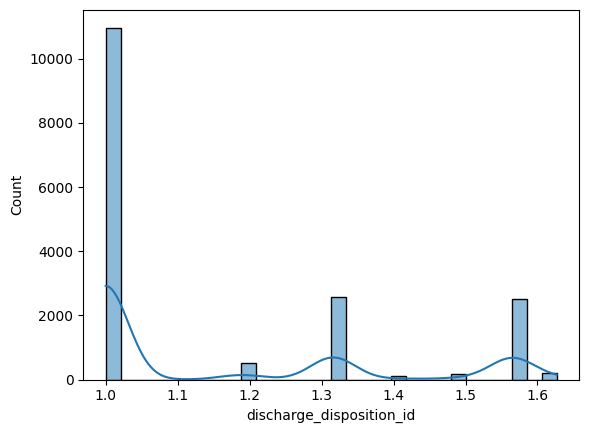

0.9970708799803848


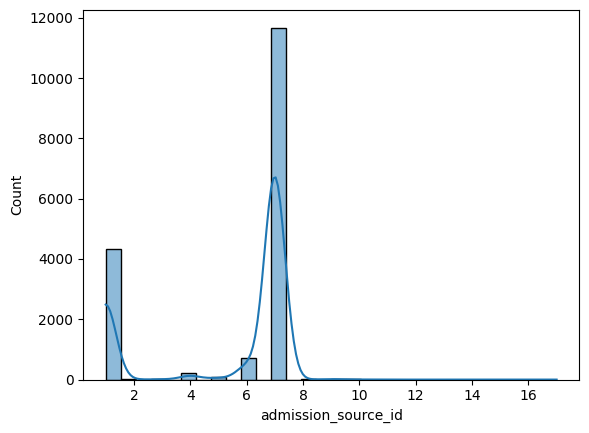

-1.0514974143591624


In [151]:
def n(i):
    sns.histplot(data=df_new1,x=i,bins=30,kde=True)
    plt.show()
    print(df_new1[i].skew())
    return
n('number_diagnoses')
n('number_inpatient')
n('number_emergency')
n('number_outpatient')
n('num_medications')
n('num_procedures')
n('time_in_hospital')
n('num_lab_procedures')
n('admission_type_id')
n('discharge_disposition_id')
n('admission_source_id')

Outliers of the numerical columns are removed and replaced


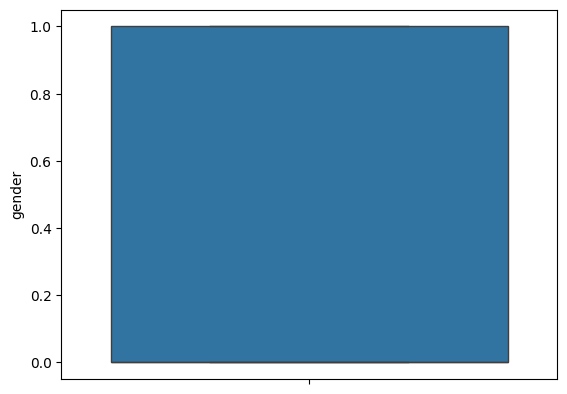

0.048364880880405275


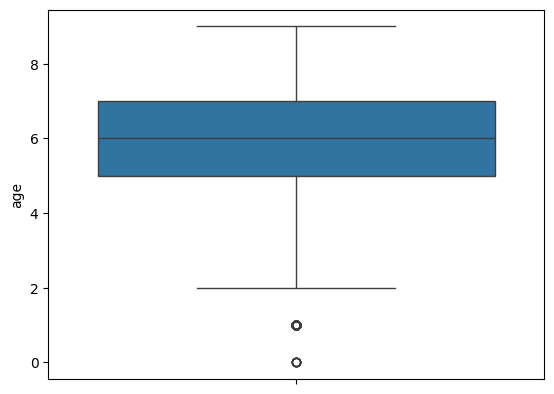

-0.4469582084159664


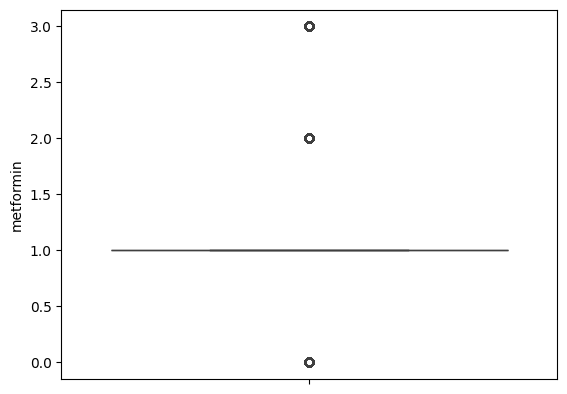

1.4322704553990566


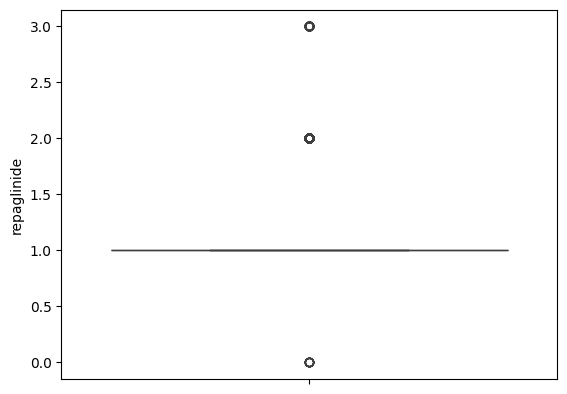

6.611192555575035


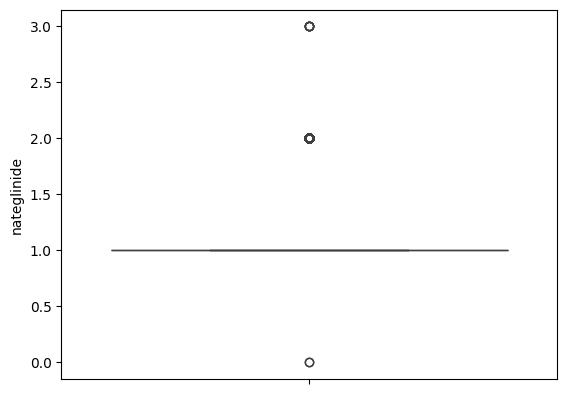

11.321033565773867


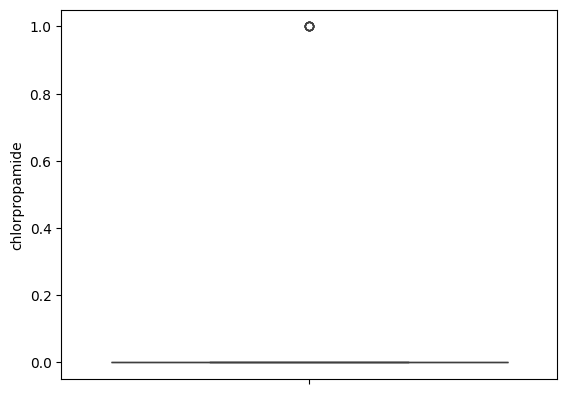

53.33854049899377


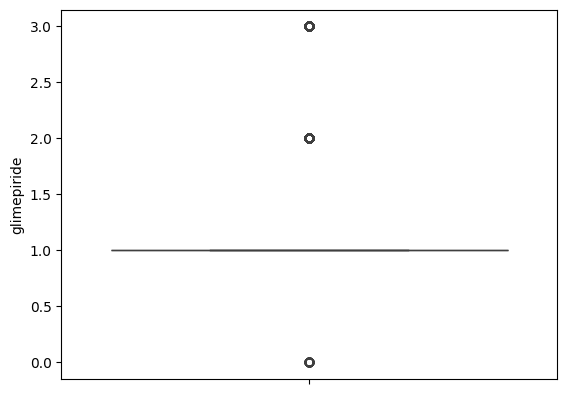

3.583592087914436


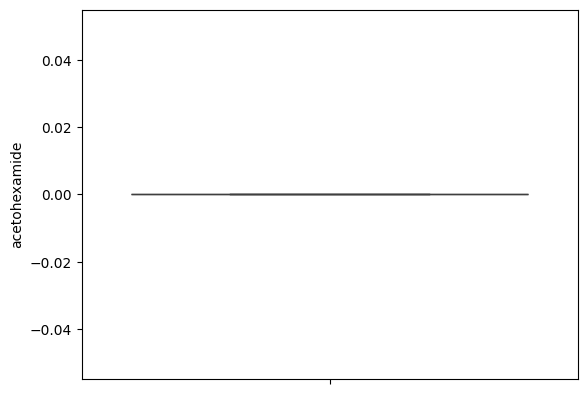

0.0


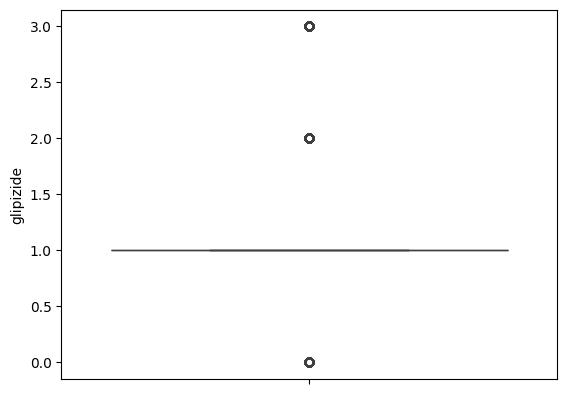

2.2444763267407386


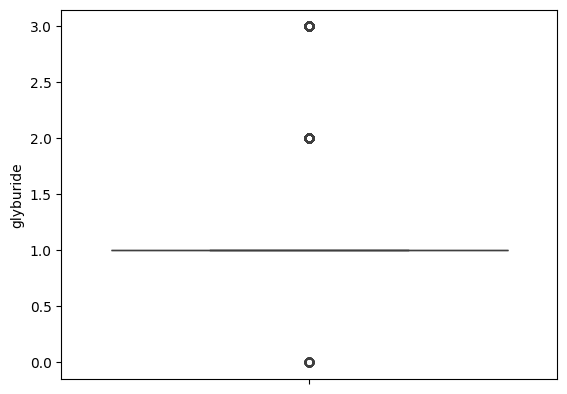

3.179556805577167


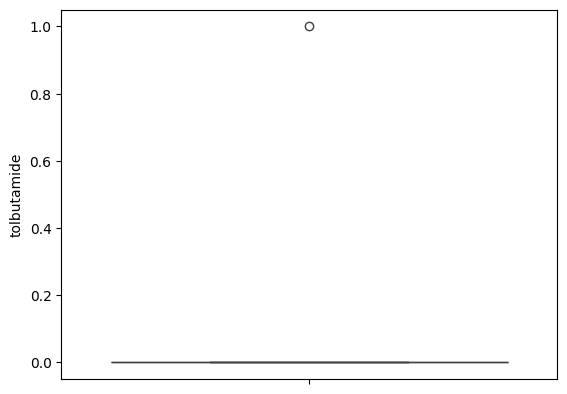

130.70960178961596


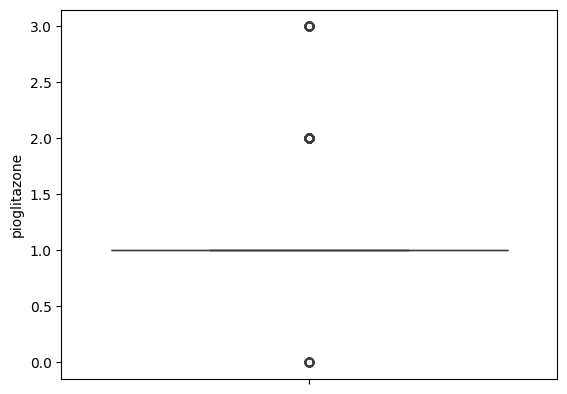

3.2686721963992946


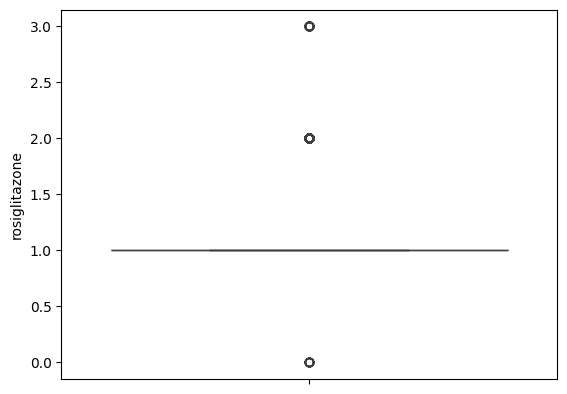

3.4276678380020726


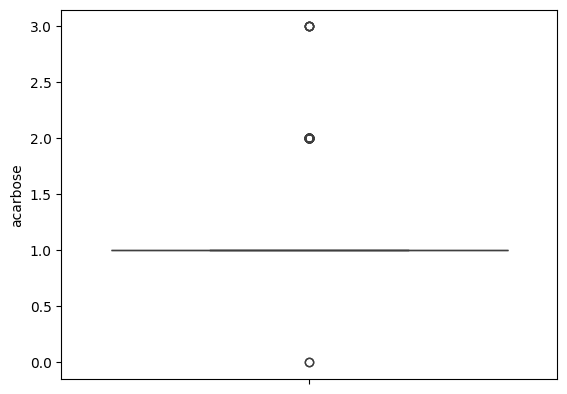

18.06877864217618


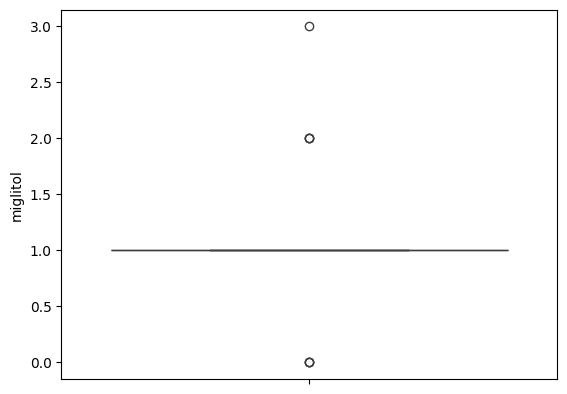

33.05675175758935


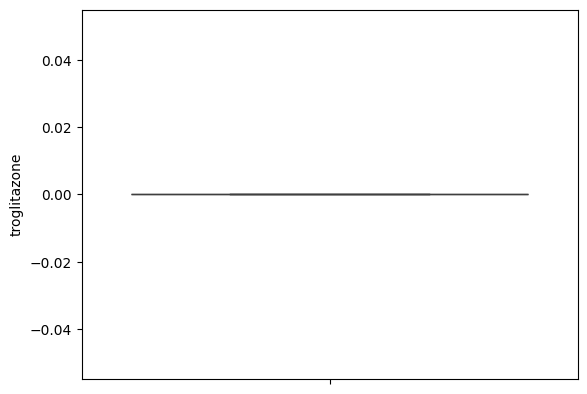

0.0


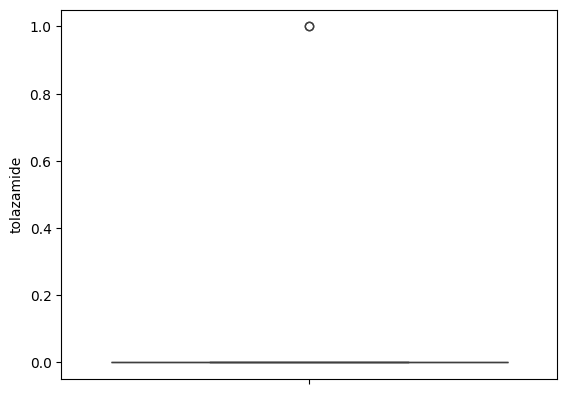

92.41752985442567


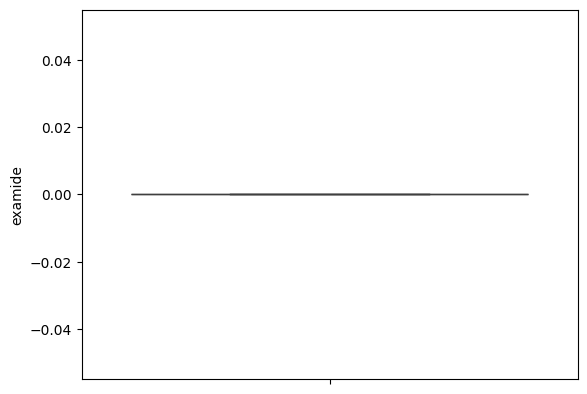

0.0


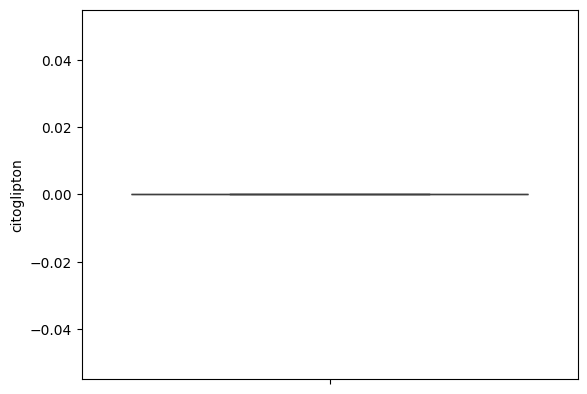

0.0


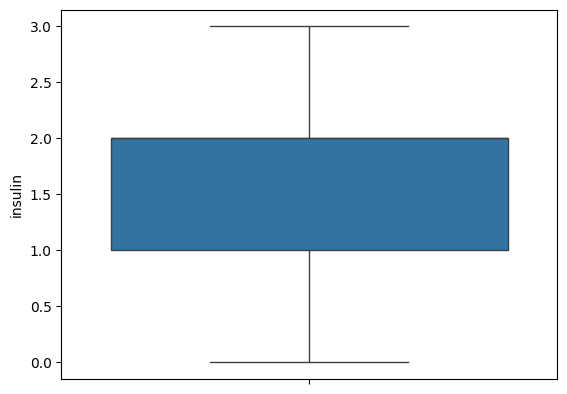

-0.00783468772068398


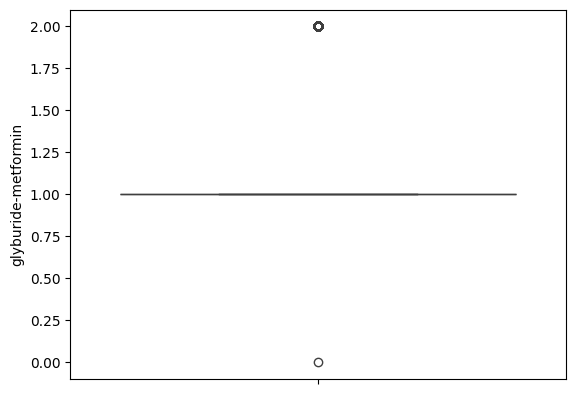

9.755914443500638


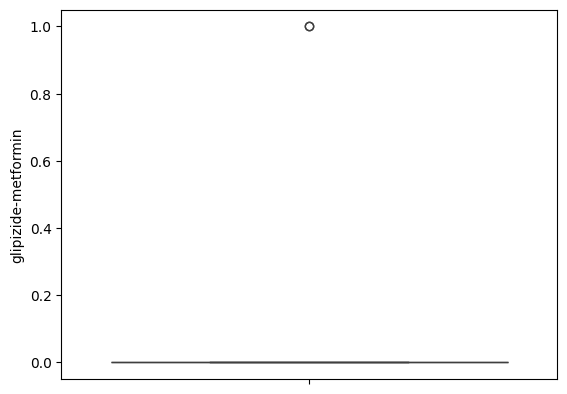

92.41752985442568


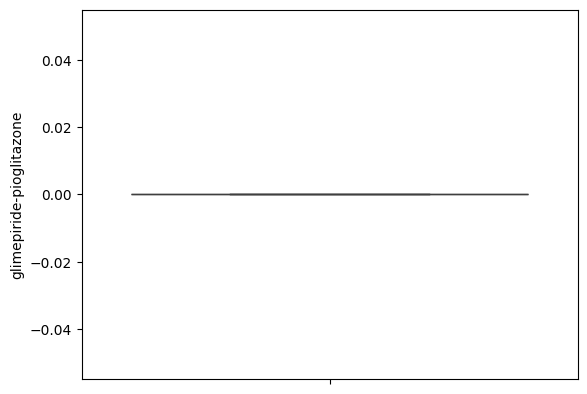

0.0


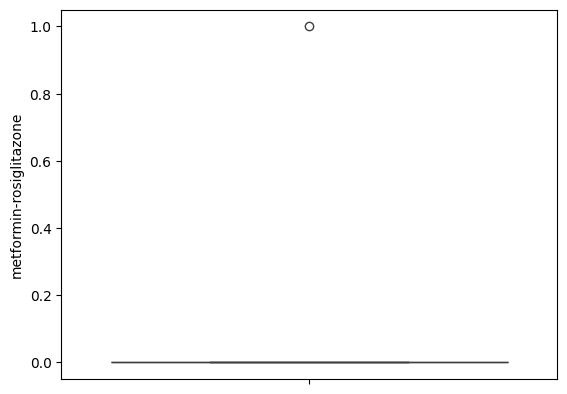

130.70960178961602


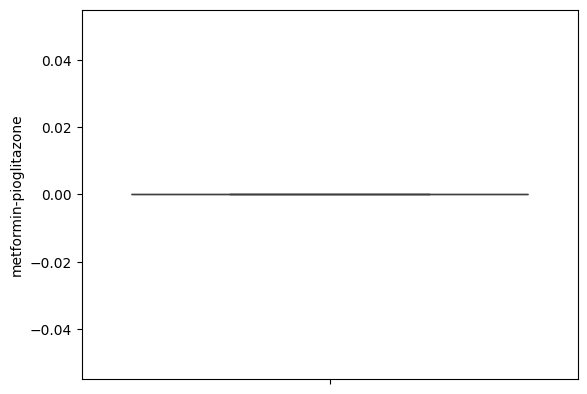

0.0


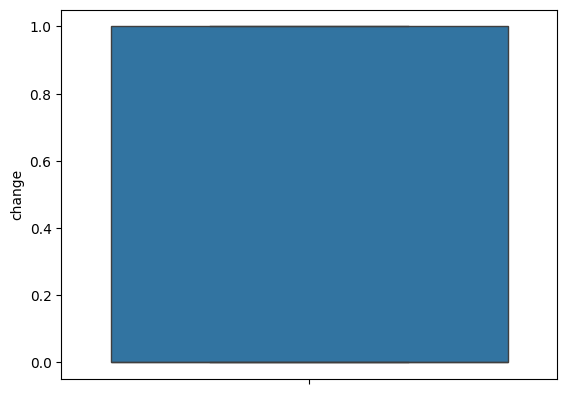

0.5593115068584197


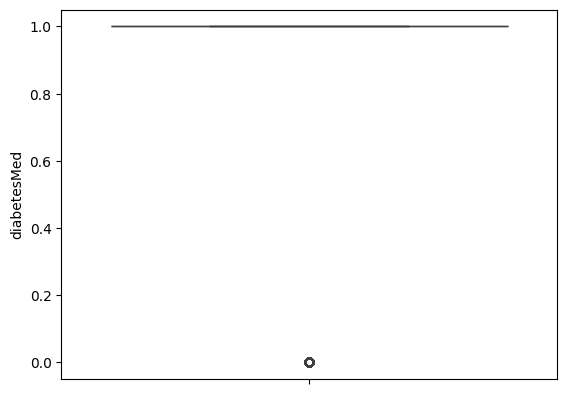

-2.173205974099887


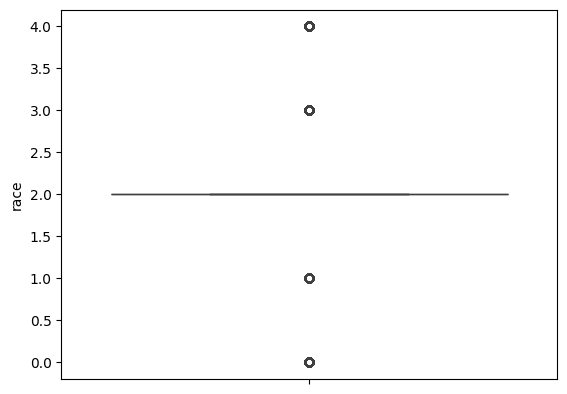

-1.0557711259319098


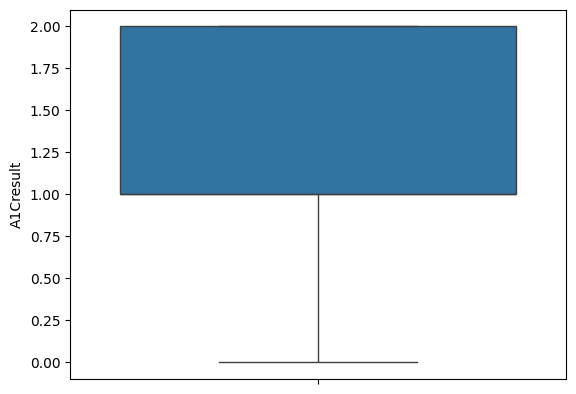

-0.1053597788880162


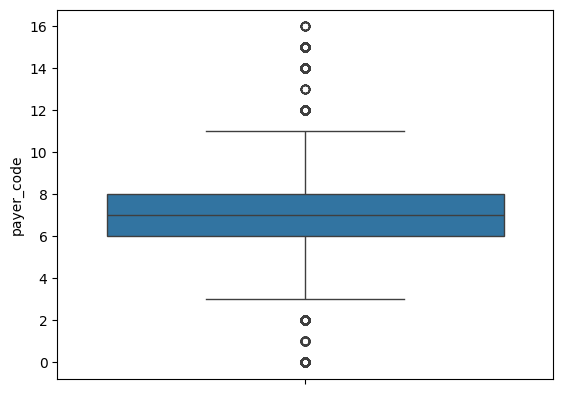

0.3073164504954793


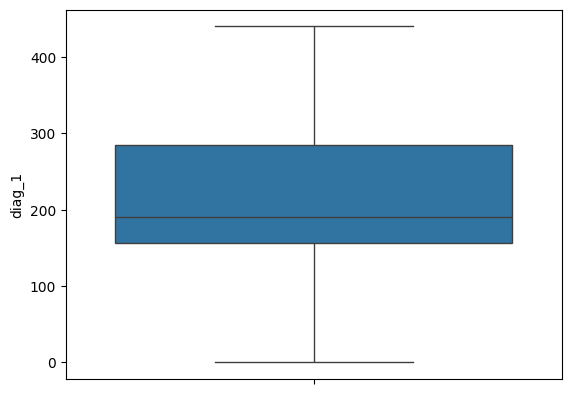

0.20214119334857084


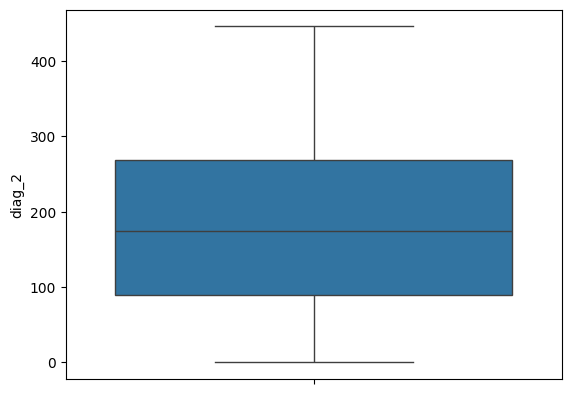

0.28940888001980003


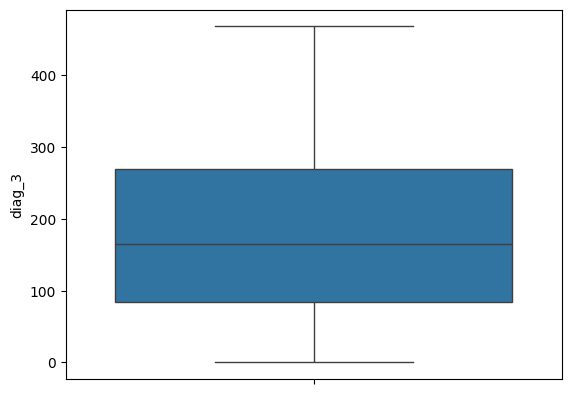

0.6343462303202919


In [152]:
#Checking outliers of categorical features using boxplot
def label(i):
    sns.boxplot(df_new1[i])
    plt.show()
    print(df_new1[i].skew())
    return
label('gender')
label('age')
label('metformin')
label('repaglinide')
label('nateglinide')
label('chlorpropamide')
label('glimepiride')
label('acetohexamide')
label('glipizide')
label('glyburide')
label('tolbutamide')
label('pioglitazone')
label('rosiglitazone')
label('acarbose')
label('miglitol')
label('troglitazone')
label('tolazamide')
label('examide')
label('citoglipton')
label('insulin')
label('glyburide-metformin')
label('glipizide-metformin')
label('glimepiride-pioglitazone')
label('metformin-rosiglitazone')
label('metformin-pioglitazone')
label('change')
label('diabetesMed')
label('race')
label('A1Cresult')
label('payer_code')
label('diag_1')
label('diag_2')
label('diag_3')


In [153]:
'''def outlier(i):
    mode_value=df_new1[i].mode()[0]
    lower_threshold=mode_value-2
    upper_threshold=mode_value+2
    df_new2=df_new1.loc[(df_new[i]<upper_threshold) & (df_new1[i]>lower_threshold)]
    df_new2=df_new1.copy()
    df_new2.loc[(df_new2[i]>upper_threshold),i]=upper_threshold
    df_new2.loc[(df_new2[i]<lower_threshold),i]=lower_threshold
    sns.boxplot(y=df_new2[i])
    plt.title(i)
    plt.show()
    print(df_new1[i].skew())
    return
#outlier('gender')
#outlier('age')
#outlier('metformin')
outlier('repaglinide')
outlier('nateglinide')
outlier('chlorpropamide')
outlier('glimepiride')
outlier('acetohexamide')
outlier('glipizide')
outlier('glyburide')
outlier('tolbutamide')
outlier('pioglitazone')
outlier('rosiglitazone')
outlier('acarbose')
outlier('miglitol')
outlier('troglitazone')
outlier('tolazamide')
#outlier('examide')
#outlier('citoglipton')
#outlier('insulin')
outlier('glyburide-metformin')
#outlier('glipizide-metformin')
outlier('glimepiride-pioglitazone')
outlier('metformin-rosiglitazone')
#outlier('metformin-pioglitazone')
outlier('change')
#outlier('diabetesMed')
#outlier('race')
outlier('payer_code')'''

"def outlier(i):\n    mode_value=df_new1[i].mode()[0]\n    lower_threshold=mode_value-2\n    upper_threshold=mode_value+2\n    df_new2=df_new1.loc[(df_new[i]<upper_threshold) & (df_new1[i]>lower_threshold)]\n    df_new2=df_new1.copy()\n    df_new2.loc[(df_new2[i]>upper_threshold),i]=upper_threshold\n    df_new2.loc[(df_new2[i]<lower_threshold),i]=lower_threshold\n    sns.boxplot(y=df_new2[i])\n    plt.title(i)\n    plt.show()\n    print(df_new1[i].skew())\n    return\n#outlier('gender')\n#outlier('age')\n#outlier('metformin')\noutlier('repaglinide')\noutlier('nateglinide')\noutlier('chlorpropamide')\noutlier('glimepiride')\noutlier('acetohexamide')\noutlier('glipizide')\noutlier('glyburide')\noutlier('tolbutamide')\noutlier('pioglitazone')\noutlier('rosiglitazone')\noutlier('acarbose')\noutlier('miglitol')\noutlier('troglitazone')\noutlier('tolazamide')\n#outlier('examide')\n#outlier('citoglipton')\n#outlier('insulin')\noutlier('glyburide-metformin')\n#outlier('glipizide-metformin')\no

In [98]:
mode_value=df_new1['payer_code'].mode()[0]
lower_threshold=mode_value-2
upper_threshold=mode_value+2


In [99]:
df_new2=df_new1.loc[(df_new1['payer_code']<upper_threshold) & (df_new1['payer_code']>lower_threshold)]

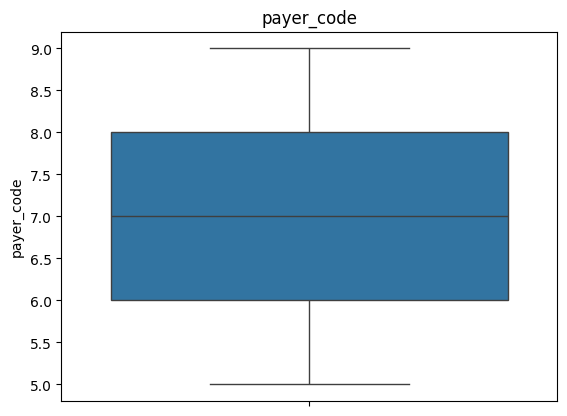

0.06947206840832737


In [89]:
df_new2=df_new1.copy()
df_new2.loc[(df_new1['payer_code']>upper_threshold),'payer_code']=upper_threshold
df_new2.loc[(df_new1['payer_code']<lower_threshold),'payer_code']=lower_threshold
sns.boxplot(y=df_new2['payer_code'])
plt.title('payer_code')
plt.show()
print(df_new2['payer_code'].skew())

There is no major outliers in the **categorical variables** of the dataset

In [155]:
df_new2

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,3,1,1.732051,6,12,15,77,2.236068,...,0,2,1,0,0,0,0,1,1,2
1,2,0,3,1,1.000000,6,13,7,75,1.414214,...,0,2,1,0,0,0,0,1,1,2
2,2,0,3,2,1.000000,4,11,7,43,2.236068,...,0,2,1,0,0,0,0,0,1,2
3,2,1,3,2,1.732051,1,12,7,68,1.000000,...,0,1,1,0,0,0,0,0,1,2
4,2,1,3,1,1.732051,7,10,7,59,1.000000,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17080,2,0,3,3,1.000000,1,9,0,52,0.000000,...,0,0,1,0,0,0,0,0,1,1
17081,2,0,3,1,1.732051,7,8,3,62,1.414214,...,0,2,1,0,0,0,0,1,1,1
17082,0,0,3,1,1.732051,7,8,7,81,1.000000,...,0,2,1,0,0,0,0,1,1,1
17083,2,1,3,1,1.000000,1,4,14,43,0.000000,...,0,0,1,0,0,0,0,0,1,1


# <font color="#4863A0"> Data Preprocessing 👨‍💻</font>

## <font size="4" face="WildWest">1. Splitting data into "Features" - "Target"</font>

In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [156]:
#Features 'inputs' X
#X=df_new1[['number_diagnoses','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','num_procedures','time_in_hospital','diabetesMed']]
X=df_new1.drop(columns=['readmitted'])
# Target variable "Outputs" (Y)
Y=df_new1['readmitted']
'''from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_resampled,Y_resampled=ros.fit_resample(X,Y)
#chi2_ft=SelectKBest(chi2,k=5)
#x=chi2_ft.fit_transform(X,Y)'''

#shape of X & Y to verify the splitting
print('Shape of X:',X.shape)
#print('Shape of x:',x.shape)
print('Shape of Y:',Y.shape)

Shape of X: (17085, 44)
Shape of Y: (17085,)


In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17085 entries, 0 to 17084
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      17085 non-null  int32  
 1   gender                    17085 non-null  int32  
 2   age                       17085 non-null  int32  
 3   admission_type_id         17085 non-null  int64  
 4   discharge_disposition_id  17085 non-null  float64
 5   admission_source_id       17085 non-null  int64  
 6   time_in_hospital          17085 non-null  int64  
 7   payer_code                17085 non-null  int32  
 8   num_lab_procedures        17085 non-null  int64  
 9   num_procedures            17085 non-null  float64
 10  num_medications           17085 non-null  int64  
 11  number_outpatient         17085 non-null  float64
 12  number_emergency          17085 non-null  float64
 13  number_inpatient          17085 non-null  float64
 14  diag_1

##### Splitting into Training -Testing data

In [158]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (13668, 44)
Shape of X_test: (3417, 44)
Shape of Y_train: (13668,)
Shape of Y_test: (3417,)


# <font color="#4863A0"> Model Selection 🧩</font>
Model selection is an essential step in machine learning that involves choosing **the most appropriate model for a given problem**. The goal of model selection is to find a model that generalizes well to unseen data and provides the best performance on the task at hand.
- Importing models for selection process
- Training our models.
    1. Decision Tree Classifier
    2. Random Forest Classifier (Highest Accuracy) 
    3. Naives Bayes
        - GaussianNB (Suitable for continuous data)
        - BernoulliNB (Suitable for binary value)
    4. Logistic Regression 
    5. Ridge Classifier CV
    6. K-Nearest Neighbors (KNN)
- For future searching
    7. Support Vector Classifier
    8. Gradient Boosting Classifier

 #### 1.Importing models for selection process

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score

#### 2.Training machine learning algorithms

#### Logistic Regression

In [161]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

#### Accuracy checking testing and training data

In [162]:
#making predictions
X_pred=logreg.predict(X_test)
lr_test_acc=accuracy_score(X_pred,Y_test)
print('logistic regression testing accuracy: ',lr_test_acc)

logistic regression testing accuracy:  0.3939127889961955


In [163]:
X_pred=logreg.predict(X_train)
lr_train_acc=accuracy_score(X_pred,Y_train)
print('logistic regression training accuracy:',lr_train_acc)

logistic regression training accuracy: 0.4002780216564238


### DecisionTreeClassifier

In [164]:
model_dt=DecisionTreeClassifier(max_depth=100,min_samples_split=6,min_samples_leaf=3)

In [165]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=6)

In [166]:
X_pred=model_dt.predict(X_train)
dt_train_acc=accuracy_score(X_pred,Y_train)
print('Decision tree classifier training accuracy:',dt_train_acc)

Decision tree classifier training accuracy: 0.9203980099502488


In [167]:
X_pred=model_dt.predict(X_test)
dt_test_acc=accuracy_score(X_pred,Y_test)
print('Decision tree classifier testing accuracy:',dt_test_acc)

Decision tree classifier testing accuracy: 0.726660813579163


### RandomForestClassifier

In [168]:
modelRF = RandomForestClassifier(n_estimators=30, random_state=45, max_depth=20)  

In [169]:
modelRF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, n_estimators=30, random_state=45)

In [170]:
X_pred=modelRF.predict(X_train)
rfc_train_acc=accuracy_score(X_pred,Y_train)
print('RandomForestClassifier training accuracy:',rfc_train_acc)

RandomForestClassifier training accuracy: 0.9986830553116769


In [171]:
X_pred=modelRF.predict(X_test)
rfc_test_acc=accuracy_score(X_pred,Y_test)
print('RandomForestClassifier testing accuracy:',rfc_test_acc)

RandomForestClassifier testing accuracy: 0.8217734855136084


In [172]:
# Gaussian Naive Bayes Parameters
'''
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
'''

# var_smoothing (Portion of the largest variance of all features that is added to variances for calculation stability.)

# Initialize lists to store training and testing accuracies
scoreListGNB_Train = []
scoreListGNB_Test = []

# Iterate over different values of var_smoothing
for i in range(1, 9):
    # Create a Gaussion Naive Bayes Model with the different values of var_smoothing
    Model_gnb = GaussianNB(var_smoothing=10**(-i))

    # Fit the model on the training data
    Model_gnb.fit(X_train, Y_train)
    
    # Calculate and store the training accuracy
    scoreListGNB_Train.append(Model_gnb.score(X_train, Y_train))
    
    # Calculate and store the testing accuracy
    scoreListGNB_Test.append(Model_gnb.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
GNB_Accuracy_Train = max(scoreListGNB_Train) 
GNB_Accuracy_Test = max(scoreListGNB_Test)

# Print the best accuracies achieved
print(f"Gaussian Naive Bayes best accuracy (Training): {GNB_Accuracy_Train*100:.2f}%")
print(f"Gaussian Naive Bayes best accuracy (Testing): {GNB_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print("The Gaussian Naive Bayes model has been trained successfully")

Gaussian Naive Bayes best accuracy (Training): 42.93%
Gaussian Naive Bayes best accuracy (Testing): 42.76%
The Gaussian Naive Bayes model has been trained successfully


In [173]:
# Bernoulli Naive Bayes Parameters
'''
sklearn.naive_bayes.BernoulliNB(*, alpha=1.0, force_alpha=True, binarize=0.0, fit_prior=True, class_prior=None)
'''

# alpha (Additive (Laplace/Lidstone) smoothing parameter)
# force_alpha (If False and alpha is close to zero, it's adjusted to 1e-10 to prevent numerical errors; otherwise, alpha stays unchanged.)
# binarize (Sets the threshold for converting sample features to binary values; if None, assumes the input is already binary.)

# Create a Bernoulli Naive Bayes Model
Model_bnb= BernoulliNB()

# Fit the model on the training data
Model_bnb.fit(X_train, Y_train)
    
# Calculate and store the training accuracy
BNB_Accuracy_Train = Model_bnb.score(X_train, Y_train)
    
# Calculate and store the testing accuracy
BNB_Accuracy_Test = Model_bnb.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Bernoulli Naive Bayes best accuracy (Training): {BNB_Accuracy_Train*100:.2f}%")
print(f"Bernoulli Naive Bayes best accuracy (Testing): {BNB_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print("The Bernoulli Naive Bayes model has been trained successfully")

Bernoulli Naive Bayes best accuracy (Training): 40.94%
Bernoulli Naive Bayes best accuracy (Testing): 39.27%
The Bernoulli Naive Bayes model has been trained successfully


In [174]:
# Ridge Classifier CV Parameters
'''
sklearn.linear_model.RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), *, 
                                       fit_intercept=True, scoring=None, 
                                       cv=None, class_weight=None, 
                                       store_cv_values=False)
'''
# alphas (Array of alpha values to try. Regularization strength)
# cv (Determines the cross-validation splitting strategy.)

# Create a Ridge Classifier Model
Model_rc= RidgeClassifierCV()

# Fit the model on the training data
Model_rc.fit(X_train,Y_train)

# Calculate and store the training accuracy
RCCV_Accuracy_Train = Model_rc.score(X_train, Y_train)

# Calculate and store the testing accuracy
RCCV_Accuracy_Test = Model_rc.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Ridge Classifier CV best accuracy (Training): {RCCV_Accuracy_Train*100:.2f}%")
print(f"Ridge Classifier CV best accuracy (Testing): {RCCV_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print("The Ridge Classifier CV model has been trained successfully")

Ridge Classifier CV best accuracy (Training): 42.39%
Ridge Classifier CV best accuracy (Testing): 42.64%
The Ridge Classifier CV model has been trained successfully


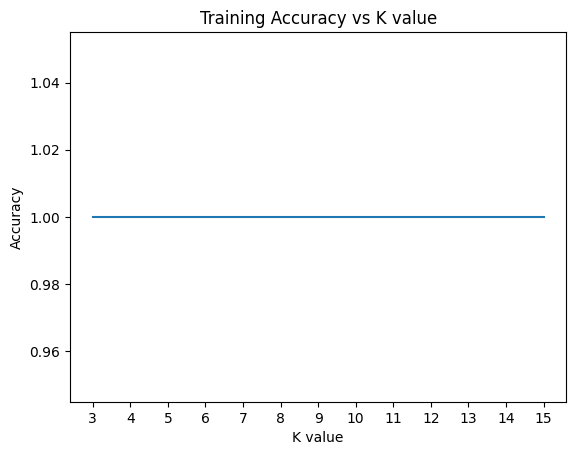

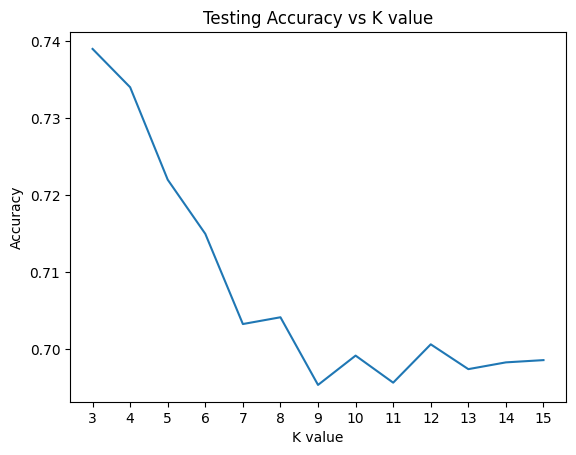

KNN best accuracy (Training): 100.00%
KNN best accuracy (Testing): 73.90%
The K-Nearest Neighbors (KNN) model has been trained successfully


In [175]:
# K-Nearest Neighbors (KNN) Parameters
'''
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, 
                                       weights='uniform', algorithm='auto', 
                                       leaf_size=30, p=2, 
                                       metric='minkowski', 
                                       metric_params=None, n_jobs=None)
'''

# n_neighbors (Number of neighbors to use by default for kneighbors queries.)
# metric (Metric to use for distance computation.)
# n_jobs (The number of parallel jobs to run for neighbors search.)

# Initialize lists to store training and testing accuracies
scoreListknn_Train = []
scoreListknn_Test = []

# Iterate over different values of n_neighbors
for i in range(3, 16):
    # Create a KNN model with the different value of n_neighbors
    Model_knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    
    # Fit the model on the training data
    Model_knn.fit(X_train, Y_train)
    
    # Calculate and store the training accuracy
    scoreListknn_Train.append(Model_knn.score(X_train, Y_train))
    
    # Calculate and store the testing accuracy
    scoreListknn_Test.append(Model_knn.score(X_test, Y_test))

# Plot the training accuracy for different values of n_neighbors
plt.plot(range(3, 16), scoreListknn_Train)
plt.xticks(np.arange(3, 16, 1))
plt.title("Training Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# Plot the testing accuracy for different values of n_neighbors
plt.plot(range(3, 16), scoreListknn_Test)
plt.xticks(np.arange(3, 16, 1))
plt.title("Testing Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# Find the maximum accuracy for both training and testing
KNN_Accuracy_Train = max(scoreListknn_Train) 
KNN_Accuracy_Test = max(scoreListknn_Test)

# Print the best accuracies achieved
print(f"KNN best accuracy (Training): {KNN_Accuracy_Train*100:.2f}%")
print(f"KNN best accuracy (Testing): {KNN_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print("The K-Nearest Neighbors (KNN) model has been trained successfully")

In [176]:
# Dictionary to store model names and their respective training scores (key:value)
model_train_scores = {
    "Model 1-Decision Tree Classifier": dt_train_acc,
    "Model 2-Random Forest Classifier": rfc_train_acc,
    "Model 3-GaussianNB": GNB_Accuracy_Train,
    "Model 3-BernoulliNB": BNB_Accuracy_Train,
    "Model 4-Logistic Regression": lr_train_acc,
    "Model 5-Ridge Classifier CV": RCCV_Accuracy_Train,
    "Model 6-K-Nearest Neighbors (KNN)": KNN_Accuracy_Train
}

# Loop through each model and print the training score
for model_name, accuracy in model_train_scores.items():
    print(f"{model_name:<50} Training Score: {accuracy*100}")

Model 1-Decision Tree Classifier                   Training Score: 92.03980099502488
Model 2-Random Forest Classifier                   Training Score: 99.86830553116769
Model 3-GaussianNB                                 Training Score: 42.932396839332746
Model 3-BernoulliNB                                Training Score: 40.942347088088965
Model 4-Logistic Regression                        Training Score: 40.02780216564238
Model 5-Ridge Classifier CV                        Training Score: 42.39098624524436
Model 6-K-Nearest Neighbors (KNN)                  Training Score: 100.0


In [177]:
# Dictionary to store model names and their respective testing scores
model_test_scores = {
    "Model 1-Decision Tree Classifier": dt_test_acc,
    "Model 2-Random Forest Classifier": rfc_test_acc,
    "Model 3-GaussianNB": GNB_Accuracy_Test,
    "Model 3-BernoulliNB": BNB_Accuracy_Test,
    "Model 4-Logistic Regression": lr_test_acc,
    "Model 5-Ridge Classifier CV": RCCV_Accuracy_Test,
    "Model 6-K-Nearest Neighbors (KNN)": KNN_Accuracy_Test
}

# Loop through each model and print the testing score
for model_name, accuracy in model_test_scores.items():
    print(f"{model_name:<50} Testing Score: {accuracy*100}")

Model 1-Decision Tree Classifier                   Testing Score: 72.6660813579163
Model 2-Random Forest Classifier                   Testing Score: 82.17734855136084
Model 3-GaussianNB                                 Testing Score: 42.756804214223
Model 3-BernoulliNB                                Testing Score: 39.27421714954639
Model 4-Logistic Regression                        Testing Score: 39.39127889961955
Model 5-Ridge Classifier CV                        Testing Score: 42.63974246414984
Model 6-K-Nearest Neighbors (KNN)                  Testing Score: 73.89522973368452


The best models in accuracy are models 1 & 2 & 6 : **Decision Tree Classifier** and **Random Forest Classifier** and **K-Nearest Neighbors (KNN)** with accuracy **74.21%**,**83.75%** & **73.92%** respectively. Which we can choose any one of them for our *deployment*. I have chosen **Random Forest Classifier** model.

# <font color="#4863A0"> Model Deployment 🛠️</font>

In [178]:
import pickle

# File mode explanation:
# 'r'  - open for reading (default)
# 'w'  - open for writing, truncating the file first
# 'x'  - create a new file and open it for writing
# 'a'  - open for writing, appending to the end of the file if it exists
# 'b'  - binary mode
# 't'  - text mode (default)
# '+'  - open a disk file for updating (reading and writing)
# 'U'  - universal newline mode (deprecated)

# Define the filename for the pickle file
filename = 'model.pkl'

# Save (serialize) the model to the file using pickle
# 'wb' mode opens the file in binary format for writing
pickle.dump(modelRF, open(filename, 'wb'))